In [1]:
#import the file from the web
import requests
from bs4 import BeautifulSoup
import pandas as pd
from unicodedata import normalize
import re
from datetime import datetime


# I can give a number or use None to remove maximum ceiling & display all columns
pd.options.display.max_columns = None

# # I want to be able to see the entire narrative, so remove the maximum width for each column
# pd.options.display.max_colwidth = None

pd.options.display.float_format = '${:,.2f}'.format


In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 8)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

# My commonly used R imports

require('tidyverse')


R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [5]:
column_names=['CAND_ID', 'CAND_NAME', 'CAND_ICI', 'PTY_CD', 'CAND_PTY_AFFILIATION', 'TTL_RECEIPTS', 'TRANS_FROM_AUTH', 'TTL_DISB', 'TRANS_TO_AUTH', 'COH_BOP', 'COH_COP', 'CAND_CONTRIB', 'CAND_LOANS', 'OTHER_LOANS', 'CAND_LOAN_REPAY', 'OTHER_LOAN_REPAY', 'DEBTS_OWED_BY', 'TTL_INDIV_CONTRIB', 'CAND_OFFICE_ST', 'CAND_OFFICE_DISTRICT', 'SPEC_ELECTION', 'PRIM_ELECTION', 'RUN_ELECTION', 'GEN_ELECTION', 'GEN_ELECTION_PRECENT', 'OTHER_POL_CMTE_CONTRIB', 'POL_PTY_CONTRIB', 'CVG_END_DT', 'INDIV_REFUNDS', 'CMTE_REFUNDS']


In [6]:
campaign_df = pd.read_csv('/Users/ivynyayieka/Downloads/writing_with_data/weball22.txt', sep='|', names=column_names)
campaign_df2 = pd.read_csv('/Users/ivynyayieka/Downloads/writing_with_data/weball20.txt', sep='|', names=column_names)
campaign_df3 = pd.read_csv('/Users/ivynyayieka/Downloads/writing_with_data/weball18.txt', sep='|', names=column_names)
campaign_df4 = pd.read_csv('/Users/ivynyayieka/Downloads/writing_with_data/weball16.txt', sep='|', names=column_names)
campaign_df5 = pd.read_csv('/Users/ivynyayieka/Downloads/writing_with_data/weball14.txt', sep='|', names=column_names)
campaign_df6 = pd.read_csv('/Users/ivynyayieka/Downloads/writing_with_data/weball12.txt', sep='|', names=column_names)


In [7]:
campaign_df

,CAND_ID,CAND_NAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,COH_BOP,COH_COP,CAND_CONTRIB,CAND_LOANS,OTHER_LOANS,CAND_LOAN_REPAY,OTHER_LOAN_REPAY,DEBTS_OWED_BY,TTL_INDIV_CONTRIB,CAND_OFFICE_ST,CAND_OFFICE_DISTRICT,SPEC_ELECTION,PRIM_ELECTION,RUN_ELECTION,GEN_ELECTION,GEN_ELECTION_PRECENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS
0,H2AK00200,"CONSTANT, CHRISTOPHER",C,1,DEM,"$164,637.90",$0.00,"$164,637.90",$0.00,$0.00,$0.00,$614.85,$0.00,$0.00,$0.00,$0.00,"$143,180.09","$158,023.05",AK,$0.00,NaN,NaN,NaN,NaN,NaN,"$1,000.00","$5,000.00",12/31/2022,"$8,300.00",$0.00
1,H2AK01158,"PELTOLA, MARY",I,1,DEM,"$7,751,293.39","$186,868.19","$7,060,033.09",$0.00,$0.00,"$691,260.30",$25.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$7,149,826.02",AK,$0.00,NaN,NaN,NaN,NaN,NaN,"$384,020.59","$10,000.00",12/31/2022,"$136,657.70","$3,912.66"
2,H2AK01240,"WOOL, ADAM L",O,1,DEM,"$16,217.07",$0.00,"$16,217.07",$0.00,$0.00,$0.00,"$1,100.00",$0.00,$0.00,$0.00,$0.00,$0.00,"$15,117.00",AK,$0.00,NaN,NaN,NaN,NaN,NaN,$0.00,$0.00,07/15/2022,$0.00,$0.00
3,H2AK00218,"REVAK, JOSHUA CARL",O,2,REP,"$121,841.00",$0.00,"$121,841.00",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$116,666.00",AK,$0.00,NaN,NaN,NaN,NaN,NaN,"$5,000.00",$0.00,09/16/2022,"$14,600.00",$0.00
4,H2AK00226,"PALIN, SARAH",O,2,REP,"$1,971,160.93","$112,963.43","$1,924,781.35",$0.00,$0.00,"$46,379.58",$0.00,$0.00,$0.00,$0.00,$0.00,"$2,525.05","$1,770,697.90",AK,$0.00,NaN,NaN,NaN,NaN,NaN,"$81,305.00",$0.00,12/31/2022,"$43,128.37","$1,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4154,S0WY00152,"BEN DAVID, MERAV",O,1,DEM,$0.00,$0.00,"$14,278.00",$0.00,"$14,278.00",$0.00,$0.00,$0.00,$0.00,"$3,830.00",$0.00,$0.00,$0.00,WY,$0.00,NaN,NaN,NaN,NaN,NaN,$0.00,$0.00,04/13/2021,$0.00,$0.00
4155,S0WY00137,"LUMMIS, CYNTHIA MARIE MRS.",I,2,REP,"$389,557.34","$103,174.96","$392,435.00",$0.00,"$114,450.23","$111,572.57",$0.00,$0.00,$0.00,"$140,500.00",$0.00,$0.00,"$180,614.81",WY,$0.00,NaN,NaN,NaN,NaN,NaN,"$104,767.57",$0.00,12/31/2022,"$1,430.25","$10,000.00"
4156,S4WY00147,"MILLER, BRYAN",O,2,REP,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$30,901.51",$0.00,WY,$0.00,NaN,NaN,NaN,NaN,NaN,$0.00,$0.00,06/30/2022,$0.00,$0.00
4157,S6WY00068,"BARRASSO, JOHN A",I,2,REP,"$1,881,044.42","$151,890.84","$1,515,357.44",$0.00,"$4,121,889.51","$4,487,576.49",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$1,113,785.67",WY,$0.00,NaN,NaN,NaN,NaN,NaN,"$614,175.00",$0.00,12/31/2022,"$1,171.00","$2,500.00"


In [8]:
# campaign_df['TTL_RECEIPTS']=campaign_df['TTL_RECEIPTS'].agg('{:.2f}'.format)

<h3>On average, incumbent candidates raise more than challengers and candidates running for open positions </h3>

<AxesSubplot: ylabel='CAND_ICI'>

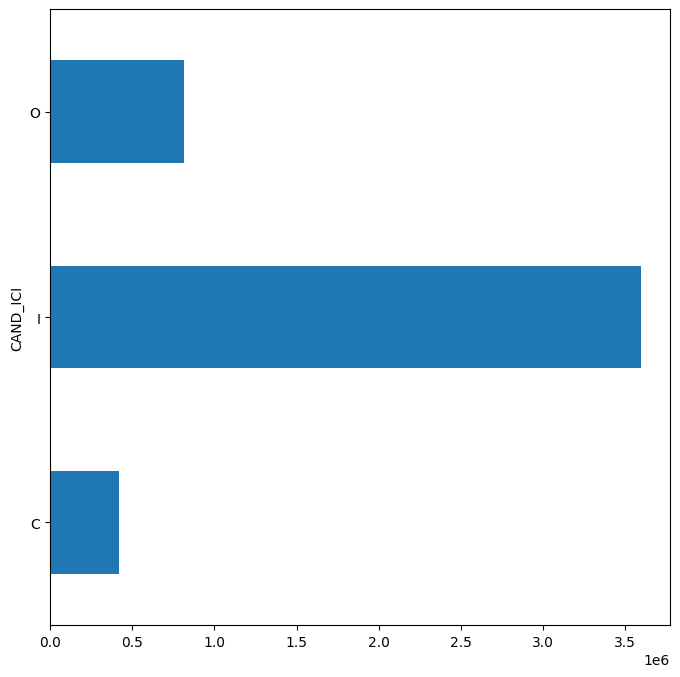

In [9]:
campaign_df.groupby('CAND_ICI').TTL_RECEIPTS.mean().plot(kind='barh')

In [10]:
decade_df=pd.concat([campaign_df, campaign_df2, campaign_df3, campaign_df4, campaign_df5, campaign_df6])

In [11]:
decade_df['year']=decade_df.CVG_END_DT.str.extract("([\d][\d][\d][\d])$")
decade_df.sample(5)

,CAND_ID,CAND_NAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,COH_BOP,COH_COP,CAND_CONTRIB,CAND_LOANS,OTHER_LOANS,CAND_LOAN_REPAY,OTHER_LOAN_REPAY,DEBTS_OWED_BY,TTL_INDIV_CONTRIB,CAND_OFFICE_ST,CAND_OFFICE_DISTRICT,SPEC_ELECTION,PRIM_ELECTION,RUN_ELECTION,GEN_ELECTION,GEN_ELECTION_PRECENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS,year
29,H2AL03032,"ROGERS, MICHAEL",I,2,REP,"$1,202,888.07",$0.00,"$1,228,340.40","$365,530.00","$527,686.03","$502,233.70",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$443,369.00",AL,$3.00,NaN,NaN,NaN,NaN,NaN,"$744,733.70","$8,000.00",12/31/2020,"$5,100.00",$0.00,2020
1285,H0MO07113,"LONG, BILLY",I,2,REP,"$1,199,797.11","$3,500.00","$952,886.74",$0.00,"$314,894.74","$561,805.11",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$584,248.80",MO,$7.00,NaN,NaN,NaN,NaN,NaN,"$604,315.64",$0.00,12/31/2014,"$10,700.00",$0.00,2014
3071,P00007039,"SMITH, ROBERT EUGENE",NaN,2,REP,$765.00,$0.00,$781.00,$0.00,$20.00,$5.00,$785.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,00,$0.00,NaN,NaN,NaN,NaN,NaN,$0.00,$0.00,12/31/2018,$0.00,$0.00,2018
685,H2FL14152,"GOSS, CHAUNCEY PORTER MR. II",O,2,REP,"$596,007.19",$0.00,"$596,007.19",$0.00,$0.00,$0.00,$0.00,"$119,613.40",$0.00,"$6,586.99",$0.00,"$113,026.41","$448,976.10",FL,$19.00,NaN,NaN,NaN,NaN,NaN,"$25,000.00",$0.00,12/31/2012,"$15,000.00","$5,000.00",2012
3386,P00015230,"TANNIRU, JOSEPH KISHORE",C,3,SEP,"$25,816.42",$0.00,"$25,738.18",$0.00,$0.00,$78.24,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$25,816.42",00,$0.00,NaN,NaN,NaN,NaN,NaN,$0.00,$0.00,12/03/2020,$30.00,$0.00,2020


In [12]:
decade_df['cand_type']=decade_df['CAND_ID'].str[0]
decade_df.cand_type.unique()

array(['H', 'S', 'P'], dtype=object)

In [13]:
decade_df.groupby(['CAND_ICI','year']).TTL_RECEIPTS.mean()

CAND_ICI  year
C         2011       $8,758.84
          2012     $712,048.03
          2013       $8,743.64
          2014     $321,011.86
          2015      $12,164.32
          2016     $330,326.41
          2017      $15,864.17
          2018     $579,711.12
          2019      $19,754.66
          2020   $5,527,514.84
          2021      $14,005.87
          2022     $510,231.17
          2023       $5,848.16
I         2011     $166,712.40
          2012   $3,504,610.32
          2013     $272,864.12
          2014   $2,051,862.63
          2015     $355,700.91
          2016   $2,005,977.73
          2017       $2,940.44
          2018   $2,936,925.29
          2019      $42,550.45
          2020   $5,005,294.62
          2021     $653,211.03
          2022   $3,733,876.88
O         2011      $47,774.25
          2012     $716,101.16
          2013      $38,050.16
          2014     $642,964.86
          2015      $36,917.24
          2016   $2,889,442.60
          2017      $20,

In [14]:
decade_df.groupby(['year', 'CAND_ICI']).TTL_RECEIPTS.mean()

year  CAND_ICI
2011  C              $8,758.84
      I            $166,712.40
      O             $47,774.25
2012  C            $712,048.03
      I          $3,504,610.32
      O            $716,101.16
2013  C              $8,743.64
      I            $272,864.12
      O             $38,050.16
2014  C            $321,011.86
      I          $2,051,862.63
      O            $642,964.86
2015  C             $12,164.32
      I            $355,700.91
      O             $36,917.24
2016  C            $330,326.41
      I          $2,005,977.73
      O          $2,889,442.60
2017  C             $15,864.17
      I              $2,940.44
      O             $20,474.10
2018  C            $579,711.12
      I          $2,936,925.29
      O            $692,264.67
2019  C             $19,754.66
      I             $42,550.45
      O             $16,759.70
2020  C          $5,527,514.84
      I          $5,005,294.62
      O            $515,975.25
2021  C             $14,005.87
      I            $653,

<h2>Exploring total summaries</h2>

<h3>Incumbent candidates have a fundraising advantage over the last decade, starting from 2012 to 2022</h3>

In [15]:
decade_df.groupby('CAND_ICI').TTL_RECEIPTS.mean()

CAND_ICI
C   $1,187,541.71
I   $3,177,237.68
O     $878,757.03
Name: TTL_RECEIPTS, dtype: float64

In [16]:
decade_df.groupby('CAND_ICI').TTL_RECEIPTS.median()

CAND_ICI
C      $11,855.53
I   $1,326,436.47
O      $21,246.05
Name: TTL_RECEIPTS, dtype: float64

In [17]:
decade_df.groupby('CAND_ICI').agg({'TTL_RECEIPTS' : np.sum,
                  'TTL_RECEIPTS' : np.mean})

,TTL_RECEIPTS
CAND_ICI,
C,"$1,187,541.71"
I,"$3,177,237.68"
O,"$878,757.03"


In [18]:
decade_df.pivot_table(index=['year','CAND_ICI'], values='TTL_RECEIPTS', aggfunc=['count','sum','median','mean','std'])

count                sum        median          mean  \
              TTL_RECEIPTS       TTL_RECEIPTS  TTL_RECEIPTS  TTL_RECEIPTS   
year CAND_ICI                                                               
2011 C                 385      $3,372,153.43         $0.00     $8,758.84   
     I                   3        $500,137.19   $209,117.08   $166,712.40   
     O                 109      $5,207,393.55         $0.13    $47,774.25   
2012 C                1689  $1,202,649,123.62    $19,831.00   $712,048.03   
     I                 535  $1,874,966,523.10 $1,251,706.94 $3,504,610.32   
     O                 512    $366,643,794.45    $46,888.62   $716,101.16   
2013 C                 409      $3,576,147.38         $0.00     $8,743.64   
     I                   7      $1,910,048.85    $14,175.00   $272,864.12   
     O                 141      $5,365,073.03        $24.00    $38,050.16   
2014 C                1330    $426,945,767.75    $13,785.00   $321,011.86   
     I                 541  $1,110,057,683.60 $1,235,547.51 $2,051,862.63   
     O                 528    $339,485,445.35    $64,666.24   $642,964.86   
2015 C                 292      $3,551,981.88         $0.00    $12,164.32   
     I                   4      $1,422,803.65   $241,705.86   $355,700.91   
     O                 143      $5,279,164.68         $0.00    $36,917.24   
2016 C                1228    $405,640,832.64    $16,678.04   $330,326.41   
     I                 537  $1,077,210,041.44 $1,238,495.44 $2,005,977.73   
     O                 646  $1,866,579,917.02    $26,569.01 $2,889,442.60   
2017 C                 342      $5,425,547.32        $31.50    $15,864.17   
     I                  14         $41,166.15         $8.41     $2,940.44   
     O                 164      $3,357,753.21       $161.50    $20,474.10   
2018 C                1657    $960,581,322.29    $27,394.25   $579,711.12   
     I                 564  $1,656,425,864.86 $1,439,984.97 $2,936,925.29   
     O                 831    $575,271,939.85    $64,000.00   $692,264.67   
2019 C                 526     $10,390,949.03        $12.65    $19,754.66   
     I                  29      $1,233,963.18        $25.81    $42,550.45   
     O                 192      $3,217,862.78         $0.00    $16,759.70   
2020 C                1897 $10,485,695,643.26    $25,210.44 $5,527,514.84   
     I                 601  $3,008,182,065.64 $1,455,776.69 $5,005,294.62   
     O                 661    $341,059,642.19    $30,082.42   $515,975.25   
2021 C                 463      $6,484,717.84         $0.00    $14,005.87   
     I                  30     $19,596,330.99       $166.78   $653,211.03   
     O                 160     $12,832,511.68       $671.00    $80,203.20   
2022 C                2034  $1,037,810,200.01    $33,601.51   $510,231.17   
     I                 631  $2,356,076,313.35 $1,664,091.40 $3,733,876.88   
     O                 762    $736,792,344.80    $36,556.56   $966,919.09   
2023 C                   2         $11,696.32     $5,848.16     $5,848.16   

                          std  
                 TTL_RECEIPTS  
year CAND_ICI                  
2011 C             $69,227.90  
     I            $150,072.63  
     O            $334,030.74  
2012 C         $11,966,787.52  
     I         $31,992,753.97  
     O          $3,055,791.90  
2013 C             $49,100.32  
     I            $410,406.06  
     O            $142,223.90  
2014 C          $1,246,064.96  
     I          $2,820,929.46  
     O          $1,653,692.07  
2015 C             $63,414.79  
     I            $413,263.87  
     O            $148,712.20  
2016 C          $1,535,874.51  
     I          $2,679,116.69  
     O         $28,854,092.96  
2017 C             $82,410.79  
     I              $6,264.65  
     O             $79,641.98  
2018 C          $3,361,142.73  
     I          $6,147,559.63  
     O          $2,251,980.88  
2019 C            $153,956.23  
     I            $135,865.15  
     O      

In [19]:
recent_df=decade_df.query("year.isin(['2016','2020'])")

In [20]:
recent_df.pivot_table(index=['year','CAND_ICI'], values='TTL_RECEIPTS', aggfunc=['count','sum','median','mean','std'])

count                sum        median          mean  \
              TTL_RECEIPTS       TTL_RECEIPTS  TTL_RECEIPTS  TTL_RECEIPTS   
year CAND_ICI                                                               
2016 C                1228    $405,640,832.64    $16,678.04   $330,326.41   
     I                 537  $1,077,210,041.44 $1,238,495.44 $2,005,977.73   
     O                 646  $1,866,579,917.02    $26,569.01 $2,889,442.60   
2020 C                1897 $10,485,695,643.26    $25,210.44 $5,527,514.84   
     I                 601  $3,008,182,065.64 $1,455,776.69 $5,005,294.62   
     O                 661    $341,059,642.19    $30,082.42   $515,975.25   

                          std  
                 TTL_RECEIPTS  
year CAND_ICI                  
2016 C          $1,535,874.51  
     I          $2,679,116.69  
     O         $28,854,092.96  
2020 C        $117,873,229.56  
     I         $31,873,950.23  
     O          $1,716,435.04

In [21]:
decade_df.to_csv("decade_df.csv")

<h2>Exploring distribution of individuals</h2>

<h3>This chart shows individual distribution rather than average:</h3>
    
>Even though average fundraising tends to be higher for incumbents, in 2020, outliers on the high end tended to be challengers, with especially high fundraising for challengers in 2020

>in 2016, individual candidates running for open positions tended to raise more funds than incumbents and challengers

>might be worth removing 2020 from the exploration to see nuances in the other years to a better scale

New names:
• `` -> `...1`
Rows: 20995 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): CAND_ID, CAND_NAME, CAND_ICI, CAND_PTY_AFFILIATION, CAND_OFFICE_ST...
dbl (22): ...1, PTY_CD, TTL_RECEIPTS, TRANS_FROM_AUTH, TTL_DISB, TRANS_TO_AU...
lgl  (1): RUN_ELECTION

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


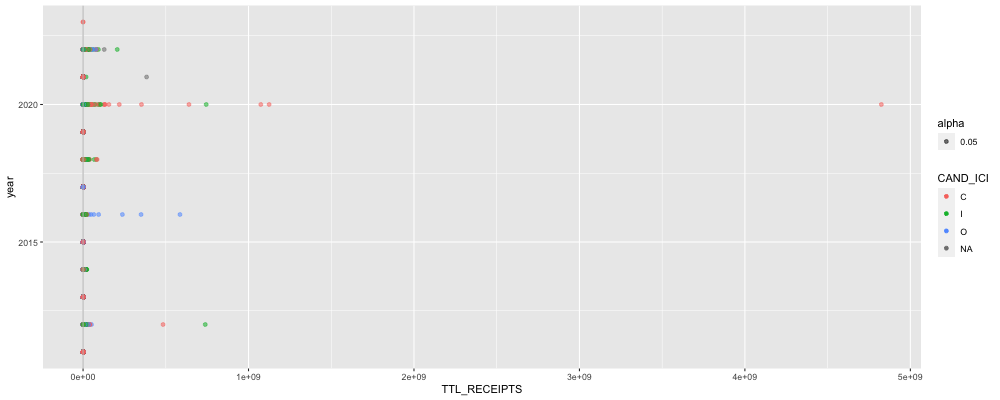

In [22]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

decade_df_r = read_csv('decade_df.csv')


ggplot(decade_df_r) +
    aes(x=TTL_RECEIPTS, y=year, color=CAND_ICI, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey')
# +facet_wrap(~CAND_ICI)

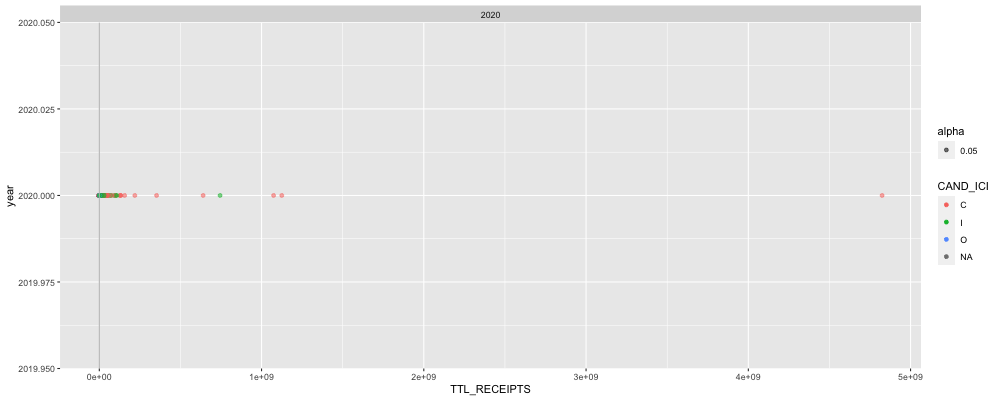

In [23]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

twenty_df_r <- decade_df_r %>%
    filter(year==2020)

ggplot(twenty_df_r) +
    aes(x=TTL_RECEIPTS, y=year, color=CAND_ICI, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey') +facet_wrap(~year, ncol=2)

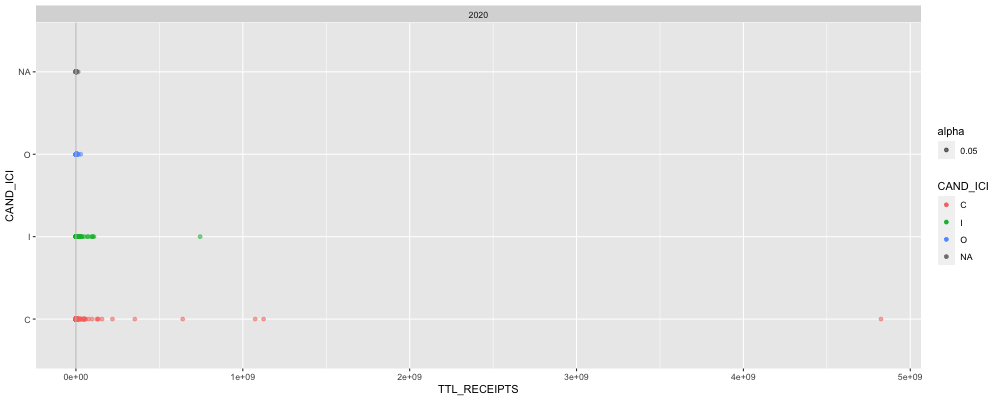

In [24]:
%%R -w 1000 -h 400

# 👉 Chart 2


ggplot(twenty_df_r) +
    aes(x=TTL_RECEIPTS, y=CAND_ICI, color=CAND_ICI, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey') +facet_wrap(~year, ncol=2)

In [25]:
# recent_df['cand_type']=recent_df['CAND_ID'].str[0]
# recent_df.cand_type.unique()

In [26]:
recent_df.to_csv("recent_df.csv")

New names:
• `` -> `...1`


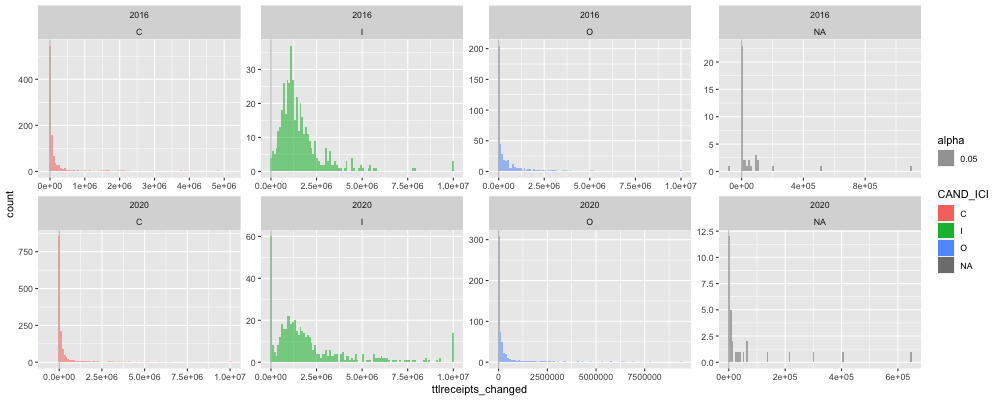

In [27]:
%%R -w 1000 -h 400

# <h3>This chart shows individual distribution rather than average:</h3>
    
# >Even though average fundraising tends to be higher for incumbents, in 2020, outliers on the high end tended to be challengers

# >in 2016, individual candidates running for open positions tended to raise more funds than incumbents and challengers

# >might be worth removing 2020 from the exploration to see nuances in the other years to a better scale

recent_df_r<-read_csv("recent_df.csv", show_col_types = FALSE) %>%
    filter(cand_type=='H')


hist_recent_df_r<-recent_df_r %>% 
                    mutate(ttlreceipts_changed = ifelse(TTL_RECEIPTS > 10000000, 10000000, TTL_RECEIPTS))




ggplot(hist_recent_df_r) +
    aes(x=ttlreceipts_changed, fill=CAND_ICI, alpha=.05) +
    geom_histogram(bins = 100) +
    geom_vline(aes(xintercept=0), color='grey') +
    facet_wrap(year~CAND_ICI, scales='free', nrow=2)

<h3>for the House, among 27 candidates raising more than 10000000 USD, more than 60% were incumbent and  </h3>

In [28]:
recent_df.query('TTL_RECEIPTS > 10000000').query('cand_type == "H"').sort_values(by='TTL_RECEIPTS',ascending=False)

,CAND_ID,CAND_NAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,COH_BOP,COH_COP,CAND_CONTRIB,CAND_LOANS,OTHER_LOANS,CAND_LOAN_REPAY,OTHER_LOAN_REPAY,DEBTS_OWED_BY,TTL_INDIV_CONTRIB,CAND_OFFICE_ST,CAND_OFFICE_DISTRICT,SPEC_ELECTION,PRIM_ELECTION,RUN_ELECTION,GEN_ELECTION,GEN_ELECTION_PRECENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS,year,cand_type
1475,H8MI09068,"PETERS, GARY",C,1,DEM,"$50,113,274.67","$1,599,397.61","$49,846,729.90",$0.00,"$1,503,727.91","$1,770,272.68",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$45,404,376.66",MI,$14.00,NaN,NaN,NaN,NaN,NaN,"$3,081,173.48","$2,500.00",12/31/2020,"$807,252.62","$20,379.52",2020,H
1203,H0LA01087,"SCALISE, STEVE MR",I,2,REP,"$38,160,641.59","$10,488,061.38","$33,728,421.42","$3,520,414.55","$1,785,499.51","$6,217,719.68",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$27,592,974.75",LA,$1.00,NaN,NaN,NaN,NaN,NaN,"$60,950.00",$0.00,12/31/2020,"$869,358.87","$9,800.00",2020,H
1599,H2MT01060,"DAINES, STEVEN",C,2,REP,"$31,879,414.77","$1,412,257.62","$33,221,808.14","$11,643.00","$1,450,176.34","$107,782.97",$0.00,$0.00,$0.00,$0.00,$0.00,"$44,813.08","$27,088,647.52",MT,$0.00,NaN,NaN,NaN,NaN,NaN,"$3,251,627.25","$51,050.00",12/31/2020,"$736,539.37","$29,002.72",2020,H
2879,H8TX31058,"HEGAR, MARY JENNINGS MJ",C,1,DEM,"$29,597,569.83","$872,922.24","$29,558,486.93","$43,000.00","$47,481.90","$86,564.80",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$28,046,021.96",TX,$31.00,NaN,NaN,NaN,NaN,NaN,"$551,645.55","$54,600.00",12/31/2020,"$249,486.42","$2,899.99",2020,H
250,H6CA22125,"MCCARTHY, KEVIN",I,2,REP,"$28,663,630.10","$5,622,873.50","$25,148,569.55","$1,596.49","$1,287,072.18","$4,802,132.73",$0.00,$0.00,$0.00,$0.00,$0.00,"$77,732.23","$21,253,771.14",CA,$23.00,NaN,NaN,NaN,NaN,NaN,"$1,686,635.02",$0.00,12/31/2020,"$831,782.73","$7,000.00",2020,H
197,H8CA05035,"PELOSI, NANCY",I,1,DEM,"$27,976,365.38","$1,769,935.00","$22,681,809.86",$0.00,"$1,004,817.82","$6,299,373.34",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$24,313,139.49",CA,$12.00,NaN,NaN,NaN,NaN,NaN,"$1,874,066.13",$80.95,12/31/2020,"$601,301.70",$600.00,2020,H
243,H8CA20059,"NUNES, DEVIN G.",I,2,REP,"$26,871,171.40","$273,018.55","$20,201,844.61","$277,057.00","$4,238,627.49","$10,907,954.28",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$25,575,224.42",CA,$22.00,NaN,NaN,NaN,NaN,NaN,"$1,014,287.92","$2,500.00",12/31/2020,"$45,098.60",$0.00,2020,H
491,H0CO04122,"GARDNER, CORY",C,2,REP,"$26,150,170.01","$3,483,492.67","$26,802,263.37",$0.00,"$1,701,437.57","$1,049,344.21",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$19,765,357.90",CO,$4.00,NaN,NaN,NaN,NaN,NaN,"$2,806,812.74","$53,568.00",12/31/2020,"$633,283.06","$30,000.00",2020,H
1334,H2MD06195,"DELANEY, JOHN K",I,1,DEM,"$23,309,690.66",$0.00,"$23,565,912.16",$0.00,"$268,248.08","$12,026.58","$1,089,076.55","$20,665,000.00",$0.00,"$15,000,000.00",$0.00,"$1,493,250.00","$1,306,296.63",MD,$6.00,NaN,NaN,NaN,NaN,NaN,"$2,000.00",$0.00,12/31/2020,"$61,925.89",$0.00,2020,H
2043,H8NY15148,"OCASIO-CORTEZ, ALEXANDRIA",I,1,DEM,"$21,166,404.22","$103,978.13","$17,506,284.55","$5,000.00","$365,236.59","$4,025,356.26",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$20,677,690.90",NY,$14.00,NaN,NaN,NaN,NaN,NaN,"$60,690.00",$0.00,12/31/2020,"$178,348.69",$0.00,2020,H


<h3>Exploring outlier behaviour</h3>
-by year: By looking at outliers, has there been a trend in either direction in terms of incumbency advantage

<h3>Among the top ten fundraisers in the last decade, six were challengers, 2 were incumbent, one was for an open position and one was unassigned</h3>

In [29]:
decade_df.sort_values(by='TTL_RECEIPTS', ascending=False).head(10)

,CAND_ID,CAND_NAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,COH_BOP,COH_COP,CAND_CONTRIB,CAND_LOANS,OTHER_LOANS,CAND_LOAN_REPAY,OTHER_LOAN_REPAY,DEBTS_OWED_BY,TTL_INDIV_CONTRIB,CAND_OFFICE_ST,CAND_OFFICE_DISTRICT,SPEC_ELECTION,PRIM_ELECTION,RUN_ELECTION,GEN_ELECTION,GEN_ELECTION_PRECENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS,year,cand_type
3296,P20003851,"ELGAR, MISS BETSY PAULINE",C,3,CON,"$4,824,617,973.00",$0.00,"$3,848,951,085.00",$0.00,$200.00,"$9,756,669,078.20","$2,831,281,203.00",$0.00,$0.00,"$1,923,500,300.00",$0.00,$0.00,"$18,853,982,587.00",00,$0.00,NaN,NaN,NaN,NaN,NaN,"$1,923,500,300.00",$0.00,04/01/2020,"$1,923,500,300.00",$0.00,2020,P
3225,P00014530,"BLOOMBERG, MICHAEL R.",C,1,DEM,"$1,124,592,944.73",$0.00,"$1,121,170,037.27",$0.00,$0.00,"$3,422,907.46","$1,089,225,532.11",$0.00,$0.00,$0.00,$0.00,"$82,387.36","$914,487.06",00,$0.00,NaN,NaN,NaN,NaN,NaN,$0.00,$0.00,12/31/2020,$0.00,$0.00,2020,P
3243,P80000722,"BIDEN, JOSEPH R JR",C,1,DEM,"$1,074,179,976.03","$243,411,324.12","$1,073,919,500.66","$1,192,592.00",$0.00,"$260,475.37",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$823,098,083.37",00,$0.00,NaN,NaN,NaN,NaN,NaN,"$563,064.21","$8,200.00",12/31/2020,"$15,774,817.90","$8,600.84",2020,P
3288,P80001571,"TRUMP, DONALD J.",I,2,REP,"$744,350,229.26","$275,176,528.12","$752,889,328.62",$801.47,"$19,292,901.20","$10,749,401.84",$0.00,$0.00,$0.00,$0.00,$0.00,"$2,733,831.97","$458,351,485.61",00,$0.00,NaN,NaN,NaN,NaN,NaN,"$846,953.30",$0.00,12/31/2020,"$11,479,280.86","$15,300.00",2020,P
2637,P80003338,"OBAMA, BARACK",I,1,DEM,"$738,503,770.41","$181,700,000.00","$737,507,855.44",$0.00,"$2,303,397.96","$3,299,312.93","$5,000.00",$0.00,$0.00,$0.00,$0.00,"$5,647,729.93","$549,580,640.18",00,$0.00,NaN,NaN,NaN,W,$50.00,$0.00,"$8,610.28",12/31/2012,"$8,979,896.30",$0.00,2012,P
3244,P80003205,"MERCER, LEE L JR",C,1,DEM,"$640,000,000.00",$0.00,"$640,000,000.00",$0.00,$-10.59,$-17.56,"$128,000,000.00",$0.00,$0.00,$0.00,$0.00,$0.00,"$512,000,000.00",00,$0.00,NaN,NaN,NaN,NaN,NaN,$0.00,$0.00,12/31/2020,$0.00,$0.00,2020,P
2216,P00003392,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",O,1,DEM,"$585,669,598.83","$160,760,000.00","$585,346,281.35",$0.00,$0.00,"$323,317.48","$1,450,335.21",$0.00,$0.00,$0.00,$0.00,$182.50,"$405,664,230.47",00,$0.00,NaN,NaN,NaN,NaN,NaN,"$1,793,640.85","$20,039.30",12/31/2016,"$5,994,030.76","$8,450.00",2016,P
2689,P80003353,"ROMNEY, MITT / RYAN, PAUL D.",C,2,REP,"$483,452,331.94","$146,516,071.00","$483,073,478.62","$444,686.59","$4,421.95","$383,275.27",$0.00,$0.00,"$20,000,000.00",$0.00,"$20,000,000.00","$825,749.00","$303,822,811.05",00,$0.00,NaN,NaN,NaN,L,$47.00,"$1,126,219.66","$10,137.50",12/31/2012,"$3,803,027.58","$34,164.49",2012,P
3389,P40004541,"MERCER JR, LEE",NaN,1,DEM,"$384,000,000.00",$0.00,"$384,000,000.00",$0.00,$-32.32,$-7.26,"$384,000,000.00",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,00,$0.00,NaN,NaN,NaN,NaN,NaN,$0.00,$0.00,06/30/2021,$0.00,$0.00,2021,P
3221,P00012716,"STEYER, TOM",C,1,DEM,"$353,041,955.53",$0.00,"$352,979,286.98",$0.00,$0.00,"$87,004.02","$317,973,624.30","$23,802,712.00",$0.00,$0.00,$0.00,"$24,000.00","$3,719,385.85",00,$0.00,NaN,NaN,NaN,NaN,NaN,$0.00,$0.00,12/31/2020,"$283,862.93",$0.00,2020,P


<h3>Among the bottom ten fundraisers in the last decade, half were challengers, 2 were incumbent, 1 was for an open position and two were unassigned</h3>


In [30]:
decade_df.sort_values(by='TTL_RECEIPTS', ascending=False).tail(10)

,CAND_ID,CAND_NAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,COH_BOP,COH_COP,CAND_CONTRIB,CAND_LOANS,OTHER_LOANS,CAND_LOAN_REPAY,OTHER_LOAN_REPAY,DEBTS_OWED_BY,TTL_INDIV_CONTRIB,CAND_OFFICE_ST,CAND_OFFICE_DISTRICT,SPEC_ELECTION,PRIM_ELECTION,RUN_ELECTION,GEN_ELECTION,GEN_ELECTION_PRECENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS,year,cand_type
21,H6AL05038,"FLIPPO, RONNIE GENE",C,1,DEM,"$-35,771.00",$0.00,$0.00,$0.00,"$246,084.00","$210,308.00",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,AL,$5.00,NaN,NaN,NaN,NaN,NaN,$0.00,$0.00,12/31/2016,$0.00,$0.00,2016,H
2477,H4TN04015,"GORDON, BART",NaN,1,DEM,"$-36,441.47",$0.00,"$122,331.18",$0.00,"$358,495.55","$199,722.90",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,TN,$6.00,NaN,NaN,NaN,NaN,NaN,$0.00,$0.00,12/31/2018,$0.00,$0.00,2018,H
1481,H0MD07197,"KLACIK, KIMBERLY",C,2,REP,"$-36,839.33",$0.00,"$588,221.88",$0.00,"$797,390.89","$172,329.68",$0.00,$0.00,$0.00,$0.00,$0.00,"$135,025.79","$-51,161.71",MD,$7.00,NaN,NaN,NaN,NaN,NaN,$0.00,$0.00,12/31/2022,"$48,884.62",$0.00,2022,H
3573,S8IN00049,"BAYH, EVAN",O,1,DEM,"$-65,780.97",$0.00,"$21,602.89",$0.00,"$1,129,029.35","$1,041,645.49",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,IN,$0.00,NaN,NaN,NaN,NaN,NaN,$0.00,$0.00,12/31/2020,$0.00,$0.00,2020,S
1843,H4TN04015,"GORDON, BART",NaN,1,DEM,"$-79,301.81",$0.00,"$116,919.16",$0.00,"$554,716.52","$358,495.55",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,TN,$6.00,NaN,NaN,NaN,NaN,NaN,$0.00,$0.00,12/31/2016,$0.00,$0.00,2016,H
679,H6FL19038,"WEXLER, ROBERT",C,1,DEM,"$-160,831.24",$0.00,"$156,112.85",$0.00,"$320,673.26","$3,729.17",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,FL,$19.00,NaN,NaN,NaN,NaN,NaN,$0.00,$0.00,12/31/2012,$0.00,$0.00,2012,H
2534,H0PA06076,"COSTELLO, RYAN A",I,2,REP,"$-233,117.47",$0.00,"$124,887.97",$0.00,"$493,433.71","$135,428.27",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,PA,$6.00,NaN,NaN,NaN,NaN,NaN,$0.00,$0.00,12/31/2022,$0.00,$0.00,2022,H
2544,H0PA07082,"MEEHAN, PATRICK L. MR",I,2,REP,"$-600,000.00","$-600,000.00",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,PA,$7.00,NaN,NaN,NaN,NaN,NaN,$0.00,$0.00,12/31/2021,$0.00,$0.00,2021,H
2964,H6VA02115,"BROWN, SHAUN DENISE",C,1,DEM,"$-674,132.50",$0.00,"$-674,157.50",$0.00,$13.88,$25.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$5,380.00",$25.00,VA,$2.00,NaN,NaN,NaN,NaN,NaN,$0.00,$0.00,12/31/2020,$0.00,$0.00,2020,H
132,H2AZ07195,"BECKER, NINA",C,2,REP,"$-1,309,815.55",$0.00,$900.19,$0.00,"$3,041,986.86","$1,731,271.12",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$-1,262,849.95",AZ,$7.00,NaN,NaN,NaN,NaN,NaN,"$-35,815.35","$-11,150.25",07/20/2022,$0.00,$0.00,2022,H


In [31]:
%%R -w 1000 -h 400
#to remove scientific notation
options(scipen=999)


<h3>Removing 2020 highlights the fundraising advantage some seven outliers in 2016 had over candidates running in racing with incumbent and challenger dynamics</h3>

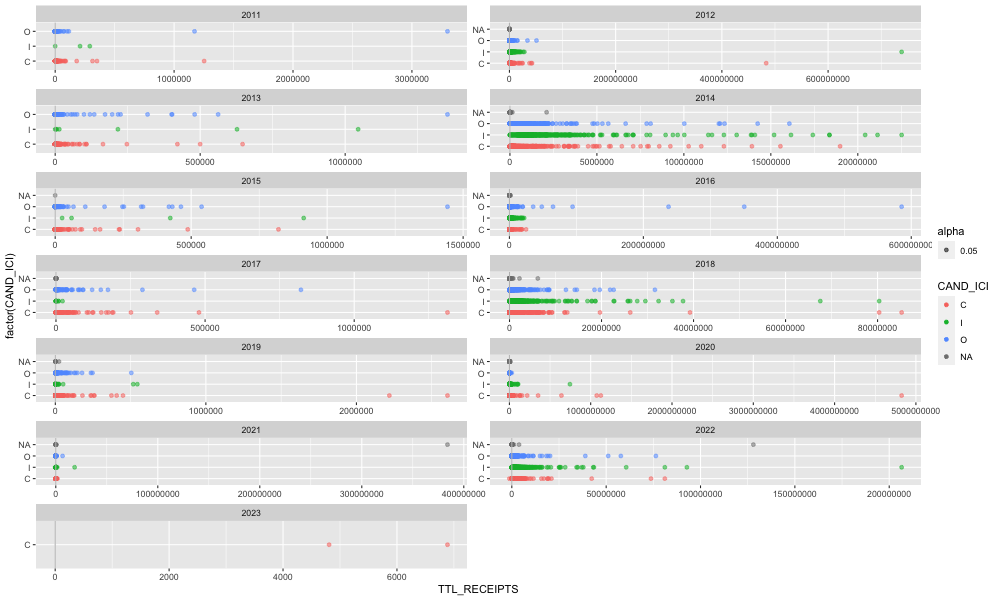

In [32]:
%%R -w 1000 -h 600

# 👉 Chart 2
# Insert code for a ggplot chart below

nine_df_r <- decade_df_r 

# %>%
#     filter(year!=2020)

ggplot(nine_df_r) +
    aes(x=TTL_RECEIPTS, y=factor(CAND_ICI), color=CAND_ICI, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey') +
    facet_wrap(~year, ncol=2, scales='free')

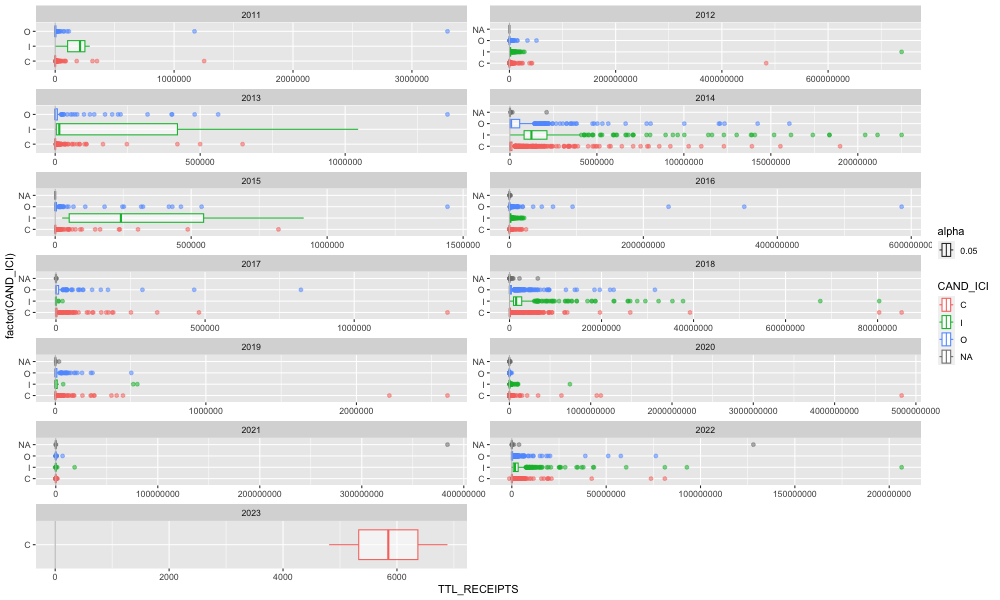

In [33]:
%%R -w 1000 -h 600

# 👉 Chart 2
# Insert code for a ggplot chart below

nine_df_r <- decade_df_r 

# %>%
#     filter(year!=2020)

ggplot(nine_df_r) +
    aes(x=TTL_RECEIPTS, y=factor(CAND_ICI), color=CAND_ICI, alpha=.05) +
    geom_boxplot() +
    geom_vline(aes(xintercept=0), color='grey') +
    facet_wrap(~year, ncol=2, scales='free')

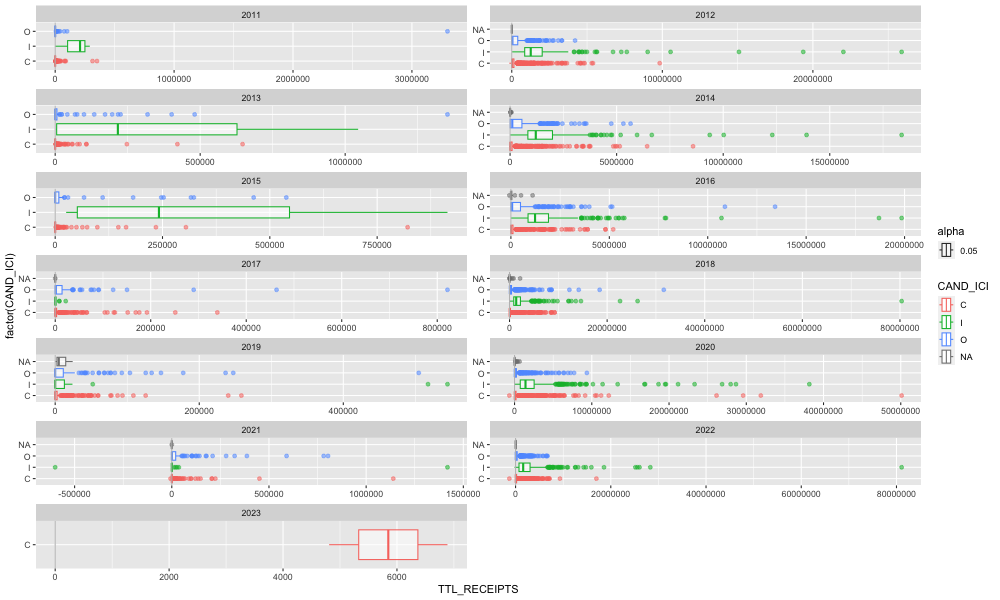

In [34]:
%%R -w 1000 -h 600

# 👉 Chart 2
# Insert code for a ggplot chart below

nine_df_r_house <- decade_df_r %>%
    filter(cand_type=="H")

ggplot(nine_df_r_house) +
    aes(x=TTL_RECEIPTS, y=factor(CAND_ICI), color=CAND_ICI, alpha=.05) +
    geom_boxplot() +
    geom_vline(aes(xintercept=0), color='grey') +
    facet_wrap(~year, ncol=2, scales='free')

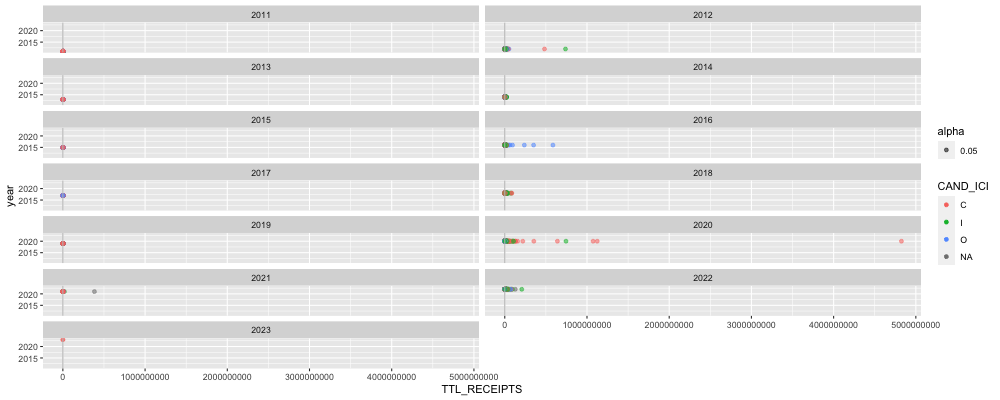

In [35]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below


ggplot(decade_df_r) +
    aes(x=TTL_RECEIPTS, y=year, color=CAND_ICI, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey') +facet_wrap(~year, ncol=2)

<h3>for 2016: Candidates did generally the same but some individuals running for open positions raised high amounts of money</h3>

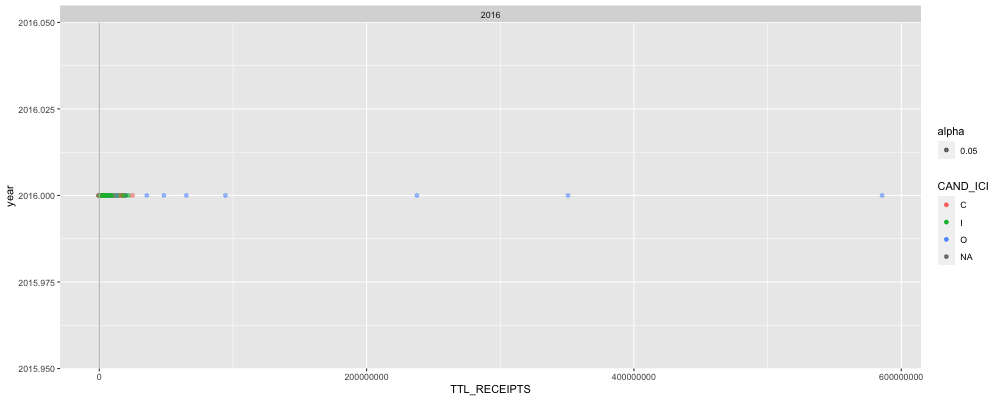

In [36]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

sixteen_df_r <- decade_df_r %>%
    filter(year==2016)

ggplot(sixteen_df_r) +
    aes(x=TTL_RECEIPTS, y=year, color=CAND_ICI, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey') +facet_wrap(~year, ncol=2)

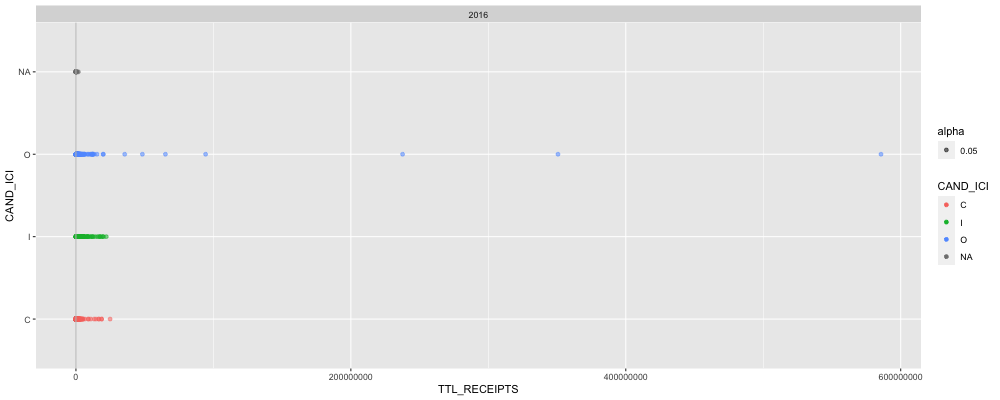

In [37]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

sixteen_df_r <- decade_df_r %>%
    filter(year==2016)

ggplot(sixteen_df_r) +
    aes(x=TTL_RECEIPTS, y=CAND_ICI, color=CAND_ICI, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey') +facet_wrap(~year, ncol=2)

<h3>In 2014, four of five outliers on the high end were incumbent. More incumbents than the other two groups raised more than 25 million and more than 50 million USD. Challengers also tended to do better than candidates running for open positions</h3>

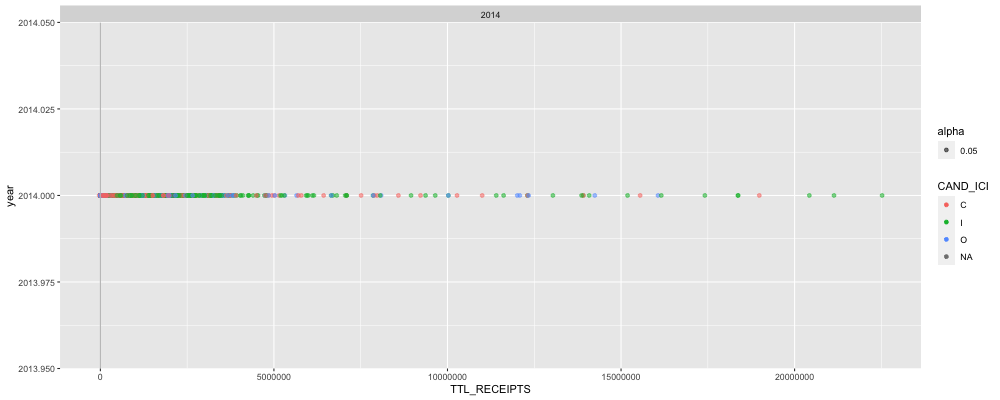

In [38]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

fourteen_df_r <- decade_df_r %>%
    filter(year==2014)

ggplot(fourteen_df_r) +
    aes(x=TTL_RECEIPTS, y=year, color=CAND_ICI, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey') +facet_wrap(~year, ncol=2)

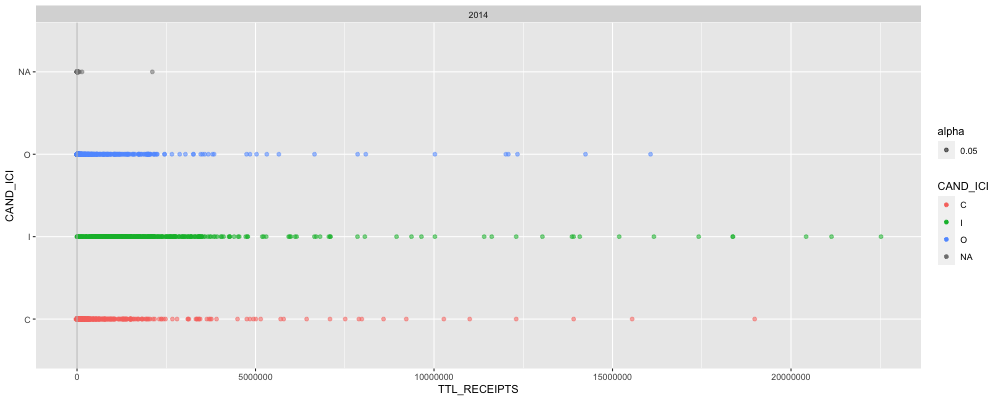

In [39]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

fourteen_df_r <- decade_df_r %>%
    filter(year==2014)

ggplot(fourteen_df_r) +
    aes(x=TTL_RECEIPTS, y=CAND_ICI, color=CAND_ICI, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey') +facet_wrap(~year, ncol=2)

<h3>for 2012: there is no obvious remarkable pattern in terms of distribution</h3>

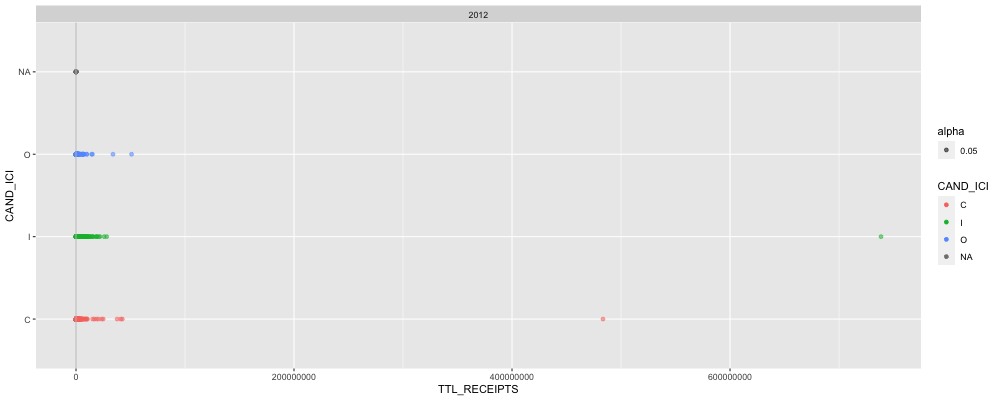

In [40]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

twelve_df_r <- decade_df_r %>%
    filter(year==2012)

ggplot(twelve_df_r) +
    aes(x=TTL_RECEIPTS, y=CAND_ICI, color=CAND_ICI, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey') +facet_wrap(~year, ncol=2)

<h3>for 2018:</h3>
Incumbents tend to fare well. More incumbents than any other group tend to raise more than 10 million dollars

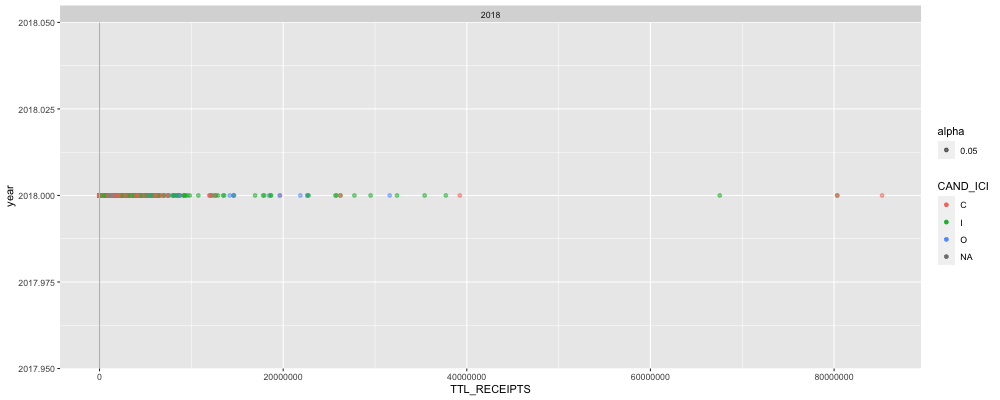

In [41]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

eighteen_df_r <- decade_df_r %>%
    filter(year==2018)

ggplot(eighteen_df_r) +
    aes(x=TTL_RECEIPTS, y=year, color=CAND_ICI, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey') +facet_wrap(~year, ncol=2)

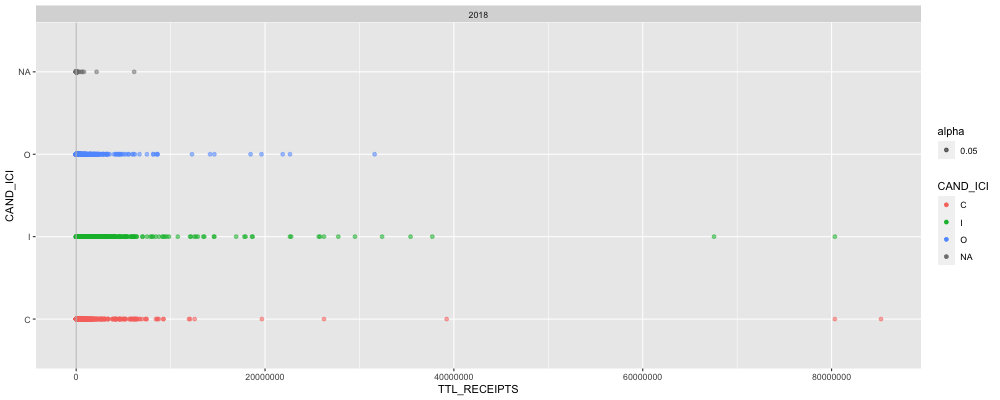

In [42]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

nine_df_r <- decade_df_r %>%
    filter(year==2018)

ggplot(nine_df_r) +
    aes(x=TTL_RECEIPTS, y=CAND_ICI, color=CAND_ICI, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey') +facet_wrap(~year, ncol=2)

<h3> for 2020, where outlier challenger is dramatic, still incumbents tend to raise generally higher amounts. There are more incumbents than challengers and open position candidates raising more than 10 million USD </h3>

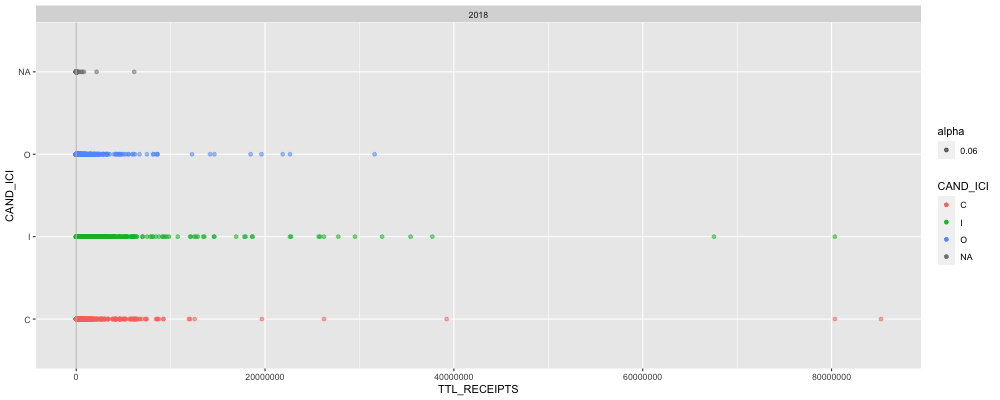

In [43]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

twenty_df_r <- decade_df_r %>%
    filter(year==2020)

ggplot(nine_df_r) +
    aes(x=TTL_RECEIPTS, y=CAND_ICI, color=CAND_ICI, alpha=.06) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey') +facet_wrap(~year, ncol=2)

<h2>Is there a difference in incumbent advantage if Dems/ Republicans/ independent candidates?</h2>

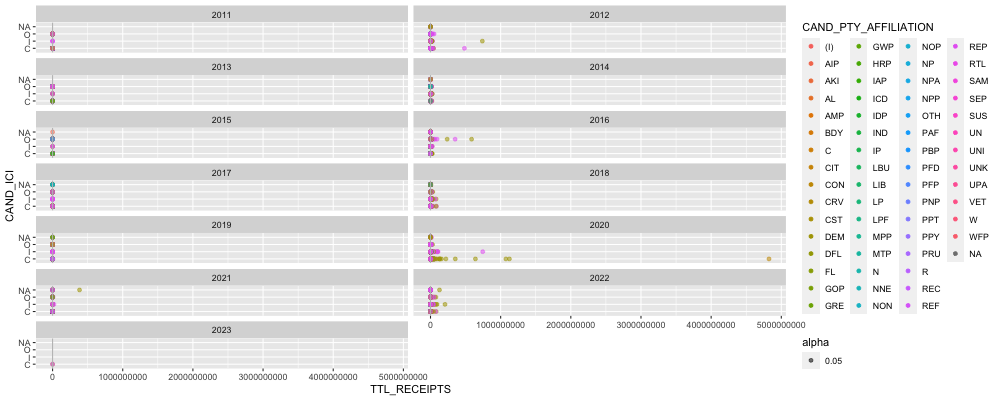

In [44]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

ggplot(decade_df_r) +
    aes(x=TTL_RECEIPTS, y=CAND_ICI, color=CAND_PTY_AFFILIATION, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey') +facet_wrap(~year, ncol=2)

<h3>There emerges a small pattern in that outliers tend to be Democrats and challenger. Let me explore the situation for each category</h3>

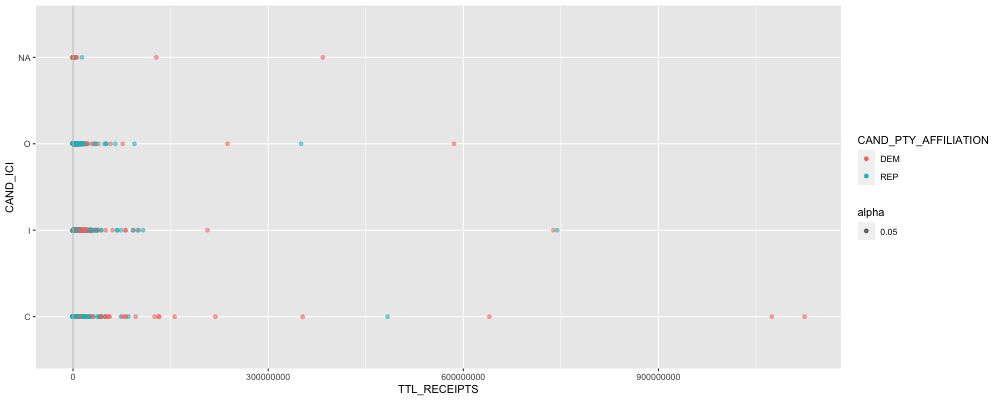

In [45]:

    
    
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

demrep_df_r <- decade_df_r %>%
    filter(CAND_PTY_AFFILIATION=="DEM" | CAND_PTY_AFFILIATION=="REP")

ggplot(demrep_df_r) +
    aes(x=TTL_RECEIPTS, y=CAND_ICI, color=CAND_PTY_AFFILIATION, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey') 

<h3>There does not seem a pattern for the incumbency advantage across the major parties compared to the other categories.</h3>

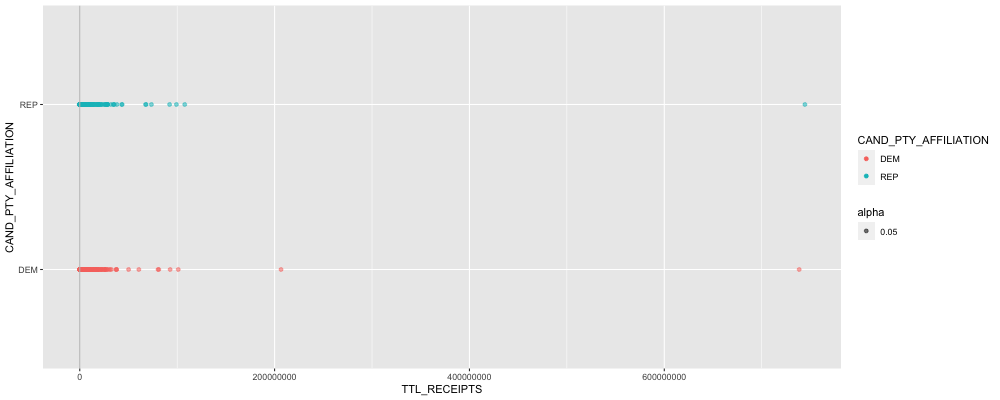

In [46]:

    
    
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

incumbent_demrep_df_r <- demrep_df_r %>%
    filter(CAND_ICI=="I")

ggplot(incumbent_demrep_df_r) +
    aes(x=TTL_RECEIPTS, y=CAND_PTY_AFFILIATION, color=CAND_PTY_AFFILIATION, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey') 

<h3>There does not seem to be a conclusive pattern for the open positions across the major parties compared to the other categories.</h3>


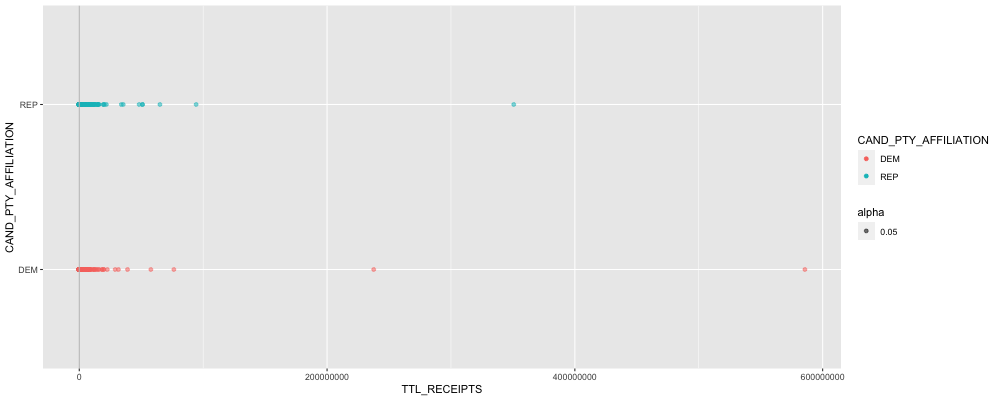

In [47]:

    
    
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

open_demrep_df_r <- demrep_df_r %>%
    filter(CAND_ICI=="O")

ggplot(open_demrep_df_r) +
    aes(x=TTL_RECEIPTS, y=CAND_PTY_AFFILIATION, color=CAND_PTY_AFFILIATION, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey') 

<h3>For the challenger position, Democrats tend to raise more funds than Republicans, with outliers raising more and more Democrats raising over 75,000,000 USD than Republicans when challenging incumbents.</h3>


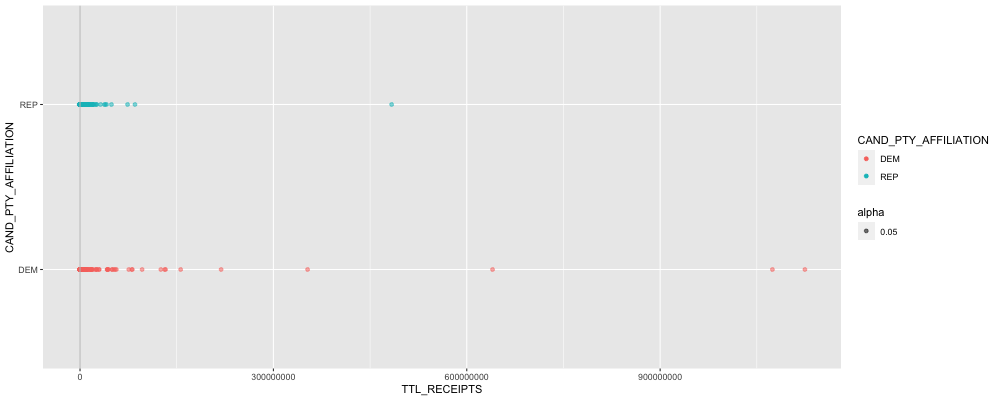

In [48]:

    
    
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

challenger_demrep_df_r <- demrep_df_r %>%
    filter(CAND_ICI=="C")

ggplot(challenger_demrep_df_r) +
    aes(x=TTL_RECEIPTS, y=CAND_PTY_AFFILIATION, color=CAND_PTY_AFFILIATION, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey') 

<h3> Exploring the house specifically</h3>

In [49]:
recent_house_df=recent_df.query('cand_type == "H"')
recent_house_df.to_csv("recent_house_df.csv")

In [50]:
recent_house_df.TTL_RECEIPTS.mean()

742754.4373690103

In [51]:
recent_house_df.pivot_table(index=['year','CAND_ICI'], values='TTL_RECEIPTS', aggfunc=['count','sum','mean'])

count               sum          mean
              TTL_RECEIPTS      TTL_RECEIPTS  TTL_RECEIPTS
year CAND_ICI                                             
2016 C                 989   $191,759,860.40   $193,892.68
     I                 438   $721,432,088.89 $1,647,105.23
     O                 425   $203,492,073.82   $478,804.88
2020 C                1459   $721,203,476.77   $494,313.56
     I                 510 $1,233,324,003.11 $2,418,282.36
     O                 575   $241,349,375.45   $419,738.04

<h3>Even for the house, the party affiliation does not matter in terms of incumbency advantage</h3>

New names:
• `` -> `...1`
Rows: 4466 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): CAND_ID, CAND_NAME, CAND_ICI, CAND_PTY_AFFILIATION, CAND_OFFICE_ST...
dbl (21): ...1, PTY_CD, TTL_RECEIPTS, TRANS_FROM_AUTH, TTL_DISB, TRANS_TO_AU...
lgl  (5): SPEC_ELECTION, PRIM_ELECTION, RUN_ELECTION, GEN_ELECTION, GEN_ELEC...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


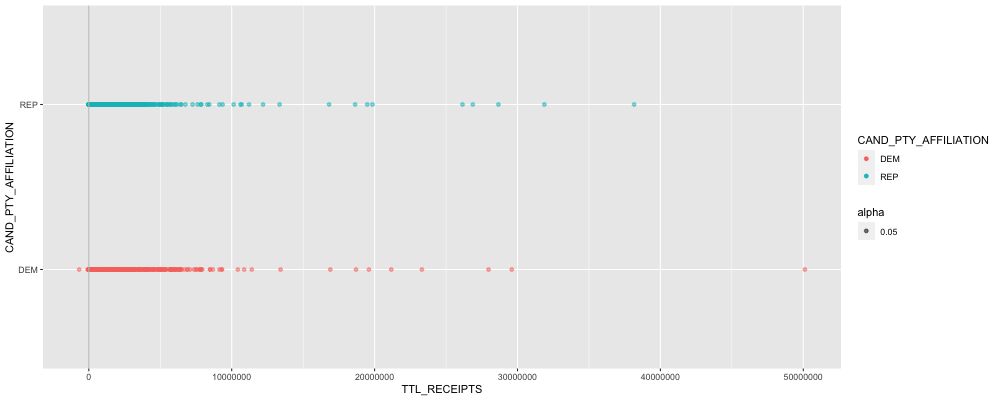

In [52]:

    
    
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

recent_house_df_r <- read_csv("recent_house_df.csv") %>%
    filter(CAND_PTY_AFFILIATION=="DEM" | CAND_PTY_AFFILIATION=="REP")

ggplot(recent_house_df_r) +
    aes(x=TTL_RECEIPTS, y=CAND_PTY_AFFILIATION, color=CAND_PTY_AFFILIATION, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey') 

New names:
• `` -> `...1`
Rows: 4466 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): CAND_ID, CAND_NAME, CAND_ICI, CAND_PTY_AFFILIATION, CAND_OFFICE_ST...
dbl (21): ...1, PTY_CD, TTL_RECEIPTS, TRANS_FROM_AUTH, TTL_DISB, TRANS_TO_AU...
lgl  (5): SPEC_ELECTION, PRIM_ELECTION, RUN_ELECTION, GEN_ELECTION, GEN_ELEC...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


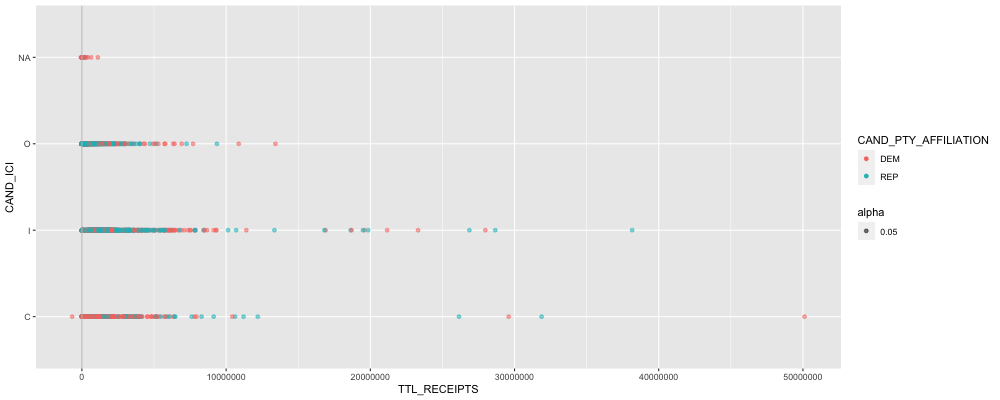

In [53]:

    
    
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

recent_house_df_r <- read_csv("recent_house_df.csv") %>%
    filter(CAND_PTY_AFFILIATION=="DEM" | CAND_PTY_AFFILIATION=="REP")

ggplot(recent_house_df_r) +
    aes(x=TTL_RECEIPTS, y=CAND_ICI, color=CAND_PTY_AFFILIATION, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey') 

<h3>for house in 2016 and 2020</h3>
>more challengers were able to raise a high amount of funds in 2020 than in 2016

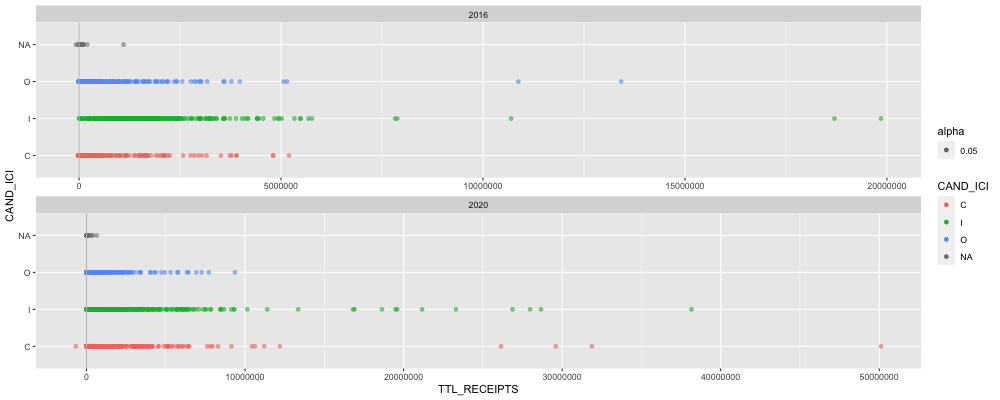

In [54]:
%%R -w 1000 -h 400
library(ggrepel)
# 👉 Chart 2
# Insert code for a ggplot chart below


ggplot(recent_house_df_r) +
    aes(x=TTL_RECEIPTS, y=CAND_ICI, color=CAND_ICI, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey') + 
    facet_wrap(~year, ncol=1, scales='free')
#     geom_label_repel(aes(label=CAND_NAME), alpha=1)


#some c

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


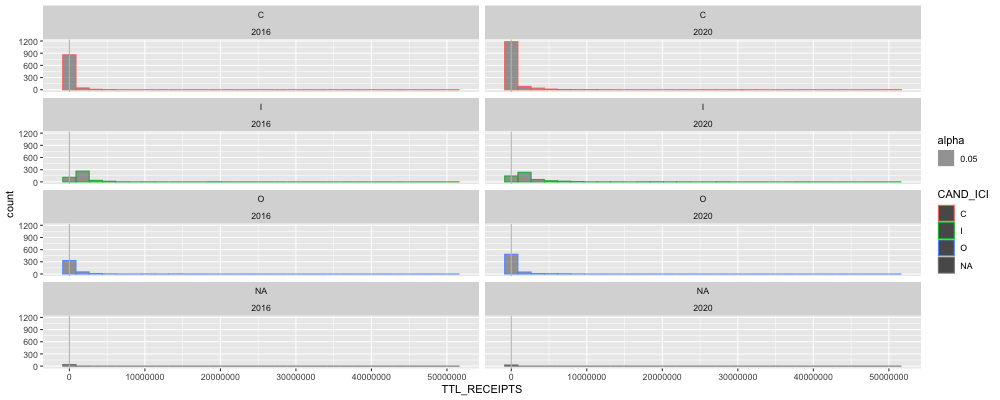

In [55]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below


ggplot(recent_house_df_r) +
    aes(x=TTL_RECEIPTS, color=CAND_ICI, alpha=.05) +
    geom_histogram() +
    geom_vline(aes(xintercept=0), color='grey') +facet_wrap(CAND_ICI~year, ncol=2)

<h3> Top 10 House fundraising</h3>

In [56]:
recent_house_df.sort_values(by='TTL_RECEIPTS', ascending=False).head(10)

,CAND_ID,CAND_NAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,COH_BOP,COH_COP,CAND_CONTRIB,CAND_LOANS,OTHER_LOANS,CAND_LOAN_REPAY,OTHER_LOAN_REPAY,DEBTS_OWED_BY,TTL_INDIV_CONTRIB,CAND_OFFICE_ST,CAND_OFFICE_DISTRICT,SPEC_ELECTION,PRIM_ELECTION,RUN_ELECTION,GEN_ELECTION,GEN_ELECTION_PRECENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS,year,cand_type
1475,H8MI09068,"PETERS, GARY",C,1,DEM,"$50,113,274.67","$1,599,397.61","$49,846,729.90",$0.00,"$1,503,727.91","$1,770,272.68",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$45,404,376.66",MI,$14.00,NaN,NaN,NaN,NaN,NaN,"$3,081,173.48","$2,500.00",12/31/2020,"$807,252.62","$20,379.52",2020,H
1203,H0LA01087,"SCALISE, STEVE MR",I,2,REP,"$38,160,641.59","$10,488,061.38","$33,728,421.42","$3,520,414.55","$1,785,499.51","$6,217,719.68",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$27,592,974.75",LA,$1.00,NaN,NaN,NaN,NaN,NaN,"$60,950.00",$0.00,12/31/2020,"$869,358.87","$9,800.00",2020,H
1599,H2MT01060,"DAINES, STEVEN",C,2,REP,"$31,879,414.77","$1,412,257.62","$33,221,808.14","$11,643.00","$1,450,176.34","$107,782.97",$0.00,$0.00,$0.00,$0.00,$0.00,"$44,813.08","$27,088,647.52",MT,$0.00,NaN,NaN,NaN,NaN,NaN,"$3,251,627.25","$51,050.00",12/31/2020,"$736,539.37","$29,002.72",2020,H
2879,H8TX31058,"HEGAR, MARY JENNINGS MJ",C,1,DEM,"$29,597,569.83","$872,922.24","$29,558,486.93","$43,000.00","$47,481.90","$86,564.80",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$28,046,021.96",TX,$31.00,NaN,NaN,NaN,NaN,NaN,"$551,645.55","$54,600.00",12/31/2020,"$249,486.42","$2,899.99",2020,H
250,H6CA22125,"MCCARTHY, KEVIN",I,2,REP,"$28,663,630.10","$5,622,873.50","$25,148,569.55","$1,596.49","$1,287,072.18","$4,802,132.73",$0.00,$0.00,$0.00,$0.00,$0.00,"$77,732.23","$21,253,771.14",CA,$23.00,NaN,NaN,NaN,NaN,NaN,"$1,686,635.02",$0.00,12/31/2020,"$831,782.73","$7,000.00",2020,H
197,H8CA05035,"PELOSI, NANCY",I,1,DEM,"$27,976,365.38","$1,769,935.00","$22,681,809.86",$0.00,"$1,004,817.82","$6,299,373.34",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$24,313,139.49",CA,$12.00,NaN,NaN,NaN,NaN,NaN,"$1,874,066.13",$80.95,12/31/2020,"$601,301.70",$600.00,2020,H
243,H8CA20059,"NUNES, DEVIN G.",I,2,REP,"$26,871,171.40","$273,018.55","$20,201,844.61","$277,057.00","$4,238,627.49","$10,907,954.28",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$25,575,224.42",CA,$22.00,NaN,NaN,NaN,NaN,NaN,"$1,014,287.92","$2,500.00",12/31/2020,"$45,098.60",$0.00,2020,H
491,H0CO04122,"GARDNER, CORY",C,2,REP,"$26,150,170.01","$3,483,492.67","$26,802,263.37",$0.00,"$1,701,437.57","$1,049,344.21",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$19,765,357.90",CO,$4.00,NaN,NaN,NaN,NaN,NaN,"$2,806,812.74","$53,568.00",12/31/2020,"$633,283.06","$30,000.00",2020,H
1334,H2MD06195,"DELANEY, JOHN K",I,1,DEM,"$23,309,690.66",$0.00,"$23,565,912.16",$0.00,"$268,248.08","$12,026.58","$1,089,076.55","$20,665,000.00",$0.00,"$15,000,000.00",$0.00,"$1,493,250.00","$1,306,296.63",MD,$6.00,NaN,NaN,NaN,NaN,NaN,"$2,000.00",$0.00,12/31/2020,"$61,925.89",$0.00,2020,H
2043,H8NY15148,"OCASIO-CORTEZ, ALEXANDRIA",I,1,DEM,"$21,166,404.22","$103,978.13","$17,506,284.55","$5,000.00","$365,236.59","$4,025,356.26",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$20,677,690.90",NY,$14.00,NaN,NaN,NaN,NaN,NaN,"$60,690.00",$0.00,12/31/2020,"$178,348.69",$0.00,2020,H


<h3>Check the House for decade trend</h3>

In [57]:
decade_house_df=decade_df.query('cand_type == "H"')
decade_house_df.to_csv("decade_house_df.csv")

New names:
• `` -> `...1`
Rows: 16795 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): CAND_ID, CAND_NAME, CAND_ICI, CAND_PTY_AFFILIATION, CAND_OFFICE_ST...
dbl (22): ...1, PTY_CD, TTL_RECEIPTS, TRANS_FROM_AUTH, TTL_DISB, TRANS_TO_AU...
lgl  (1): RUN_ELECTION

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


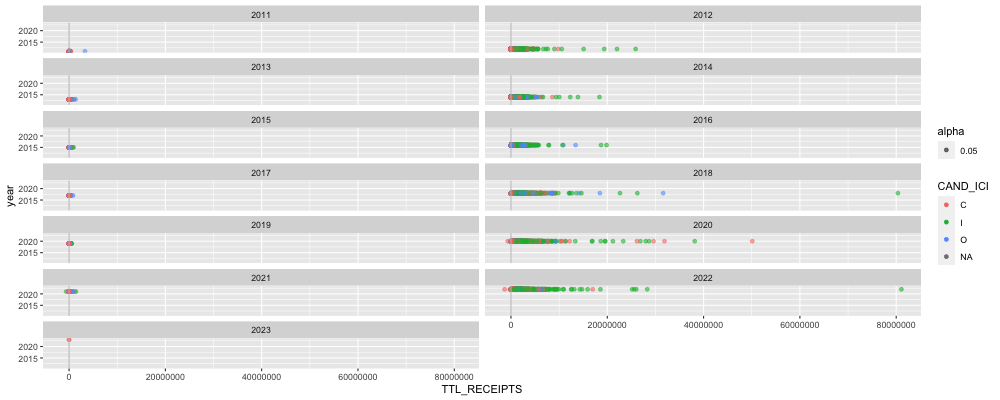

In [58]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

decade_house_df_r <- read_csv("decade_house_df.csv")

ggplot(decade_house_df_r) +
    aes(x=TTL_RECEIPTS, y=year, color=CAND_ICI, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey') +facet_wrap(~year, ncol=2)

New names:
• `` -> `...1`
Rows: 16795 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): CAND_ID, CAND_NAME, CAND_ICI, CAND_PTY_AFFILIATION, CAND_OFFICE_ST...
dbl (22): ...1, PTY_CD, TTL_RECEIPTS, TRANS_FROM_AUTH, TTL_DISB, TRANS_TO_AU...
lgl  (1): RUN_ELECTION

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


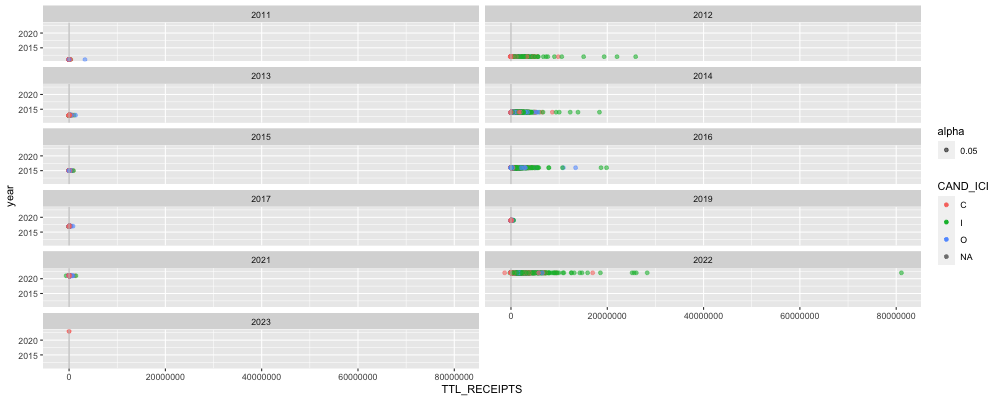

In [59]:

%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

decade_house_df_r <- read_csv("decade_house_df.csv") %>%
    filter(year!="2020" & year!="2018")

ggplot(decade_house_df_r) +
    aes(x=TTL_RECEIPTS, y=year, color=CAND_ICI, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey') +facet_wrap(~year, ncol=2)




In [60]:
aoc_df=decade_df.query("CAND_NAME.isin(['OCASIO-CORTEZ, ALEXANDRIA'])")
aoc_df

,CAND_ID,CAND_NAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,COH_BOP,COH_COP,CAND_CONTRIB,CAND_LOANS,OTHER_LOANS,CAND_LOAN_REPAY,OTHER_LOAN_REPAY,DEBTS_OWED_BY,TTL_INDIV_CONTRIB,CAND_OFFICE_ST,CAND_OFFICE_DISTRICT,SPEC_ELECTION,PRIM_ELECTION,RUN_ELECTION,GEN_ELECTION,GEN_ELECTION_PRECENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS,year,cand_type
2209,H8NY15148,"OCASIO-CORTEZ, ALEXANDRIA",I,1,DEM,"$12,513,212.80","$127,000.00","$11,350,202.75",$0.00,"$4,025,356.26","$5,188,366.31",$18.55,$0.00,$0.00,$0.00,$0.00,$0.00,"$12,224,397.76",NY,$14.00,NaN,NaN,NaN,NaN,NaN,"$54,934.90",$0.00,12/31/2022,"$104,001.53",$0.00,2022,H
2043,H8NY15148,"OCASIO-CORTEZ, ALEXANDRIA",I,1,DEM,"$21,166,404.22","$103,978.13","$17,506,284.55","$5,000.00","$365,236.59","$4,025,356.26",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$20,677,690.90",NY,$14.00,NaN,NaN,NaN,NaN,NaN,"$60,690.00",$0.00,12/31/2020,"$178,348.69",$0.00,2020,H
1945,H8NY15148,"OCASIO-CORTEZ, ALEXANDRIA",C,1,DEM,"$2,147,896.37",$0.00,"$1,782,301.81","$5,000.00",$0.00,"$365,236.59",$0.00,$0.00,$0.00,$0.00,$0.00,"$1,816.06","$2,045,386.06",NY,$14.00,NaN,NaN,NaN,NaN,NaN,"$77,617.63",$0.00,12/31/2018,"$32,366.64",$0.00,2018,H


In [61]:
lieu_df=decade_df.query("CAND_NAME.isin(['LIEU, TED'])")
lieu_df

,CAND_ID,CAND_NAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,COH_BOP,COH_COP,CAND_CONTRIB,CAND_LOANS,OTHER_LOANS,CAND_LOAN_REPAY,OTHER_LOAN_REPAY,DEBTS_OWED_BY,TTL_INDIV_CONTRIB,CAND_OFFICE_ST,CAND_OFFICE_DISTRICT,SPEC_ELECTION,PRIM_ELECTION,RUN_ELECTION,GEN_ELECTION,GEN_ELECTION_PRECENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS,year,cand_type
376,H4CA33119,"LIEU, TED",I,1,DEM,"$1,510,163.27","$102,703.37","$2,660,136.42",$0.00,"$1,944,363.98","$794,390.83",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$961,528.71",CA,$36.00,NaN,NaN,NaN,NaN,NaN,"$421,448.32",$0.00,12/31/2022,"$12,337.00",$500.00,2022,H
316,H4CA33119,"LIEU, TED",I,1,DEM,"$1,680,669.10","$4,757.66","$1,601,806.11",$0.00,"$1,865,000.99","$1,944,363.98",$0.00,$0.00,$0.00,$0.00,$0.00,"$2,800.00","$1,110,429.17",CA,$33.00,NaN,NaN,NaN,NaN,NaN,"$516,900.00",$0.00,12/31/2020,"$17,233.56",$0.00,2020,H
318,H4CA33119,"LIEU, TED",I,1,DEM,"$1,785,339.23",$0.00,"$974,393.02",$0.00,"$1,054,054.78","$1,865,000.99",$0.00,$0.00,$0.00,$0.00,$0.00,"$35,678.54","$1,294,042.54",CA,$33.00,NaN,NaN,NaN,NaN,NaN,"$475,918.00",$0.00,12/31/2018,"$13,428.67",$0.00,2018,H
266,H4CA33119,"LIEU, TED",I,1,DEM,"$2,066,220.28",$0.00,"$1,116,571.91",$0.00,"$121,864.10","$1,054,054.78",$1.00,$0.00,$0.00,$0.00,$0.00,"$17,518.11","$1,556,168.72",CA,$33.00,NaN,NaN,NaN,NaN,NaN,"$494,955.05",$0.00,12/31/2016,"$23,700.00",$0.00,2016,H
328,H4CA33119,"LIEU, TED",O,1,DEM,"$2,455,885.50","$46,300.00","$2,336,271.40",$0.00,$0.00,"$121,864.10","$5,200.00","$76,000.00",$0.00,"$76,000.00",$0.00,"$51,028.08","$1,686,439.43",CA,$33.00,NaN,W,NaN,NaN,NaN,"$542,779.07",$0.00,12/31/2014,"$17,600.00",$0.00,2014,H


In [62]:
roy_df=decade_df.query("CAND_NAME.isin(['ROY, CHIP'])")
roy_df

,CAND_ID,CAND_NAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,COH_BOP,COH_COP,CAND_CONTRIB,CAND_LOANS,OTHER_LOANS,CAND_LOAN_REPAY,OTHER_LOAN_REPAY,DEBTS_OWED_BY,TTL_INDIV_CONTRIB,CAND_OFFICE_ST,CAND_OFFICE_DISTRICT,SPEC_ELECTION,PRIM_ELECTION,RUN_ELECTION,GEN_ELECTION,GEN_ELECTION_PRECENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS,year,cand_type
2918,H8TX21307,"ROY, CHIP",I,2,REP,"$2,344,485.00","$229,020.37","$1,559,344.77",$0.00,"$463,582.78","$1,248,723.01",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$1,791,443.40",TX,$21.00,NaN,NaN,NaN,NaN,NaN,"$302,073.71",$0.00,12/31/2022,"$17,650.00",$0.00,2022,H
2766,H8TX21307,"ROY, CHIP",I,2,REP,"$5,098,026.87","$263,183.17","$4,771,749.89",$0.00,"$137,305.80","$463,582.78",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$4,196,741.71",TX,$21.00,NaN,NaN,NaN,NaN,NaN,"$607,516.00","$2,000.00",12/31/2020,"$63,801.47",$0.00,2020,H
2665,H8TX21307,"ROY, CHIP",O,2,REP,"$1,895,147.95","$1,820.58","$1,757,842.15",$0.00,$0.00,"$137,305.80","$1,308.57",$0.00,$0.00,$0.00,$0.00,$0.00,"$1,584,679.51",TX,$21.00,NaN,NaN,NaN,NaN,NaN,"$306,839.29",$500.00,12/31/2018,"$8,250.00","$2,000.00",2018,H


In [63]:
carter_df=decade_df.query("CAND_NAME.isin(['CARTER, JOHN R. REP.'])")
carter_df

,CAND_ID,CAND_NAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,COH_BOP,COH_COP,CAND_CONTRIB,CAND_LOANS,OTHER_LOANS,CAND_LOAN_REPAY,OTHER_LOAN_REPAY,DEBTS_OWED_BY,TTL_INDIV_CONTRIB,CAND_OFFICE_ST,CAND_OFFICE_DISTRICT,SPEC_ELECTION,PRIM_ELECTION,RUN_ELECTION,GEN_ELECTION,GEN_ELECTION_PRECENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS,year,cand_type
3009,H2TX31044,"CARTER, JOHN R. REP.",I,2,REP,"$1,339,836.16","$209,270.26","$1,128,750.23",$0.00,"$200,405.54","$411,491.47",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$613,873.62",TX,$31.00,NaN,NaN,NaN,NaN,NaN,"$514,132.63",$0.00,12/31/2022,"$3,799.78","$2,500.00",2022,H
2882,H2TX31044,"CARTER, JOHN R. REP.",I,2,REP,"$2,168,867.75","$148,878.76","$2,223,167.18",$0.00,"$254,704.97","$200,405.54",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$1,074,706.50",TX,$31.00,NaN,NaN,NaN,NaN,NaN,"$939,050.00",$250.00,12/31/2020,"$6,307.07",$0.00,2020,H
2739,H2TX31044,"CARTER, JOHN R. REP.",I,2,REP,"$1,820,252.88",$0.00,"$1,968,957.43",$0.00,"$403,409.52","$254,704.97",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$821,996.59",TX,$31.00,NaN,NaN,NaN,NaN,NaN,"$995,746.15",$0.00,12/31/2018,"$18,500.00","$4,500.00",2018,H
1984,H2TX31044,"CARTER, JOHN R. REP.",I,2,REP,"$1,062,407.96",$0.00,"$1,257,077.88",$0.00,"$598,079.44","$403,409.52",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$443,411.25",TX,$31.00,NaN,NaN,NaN,NaN,NaN,"$614,480.10",$0.00,12/31/2016,"$6,500.00","$2,000.00",2016,H
2131,H2TX31044,"CARTER, JOHN R. REP.",I,2,REP,"$996,110.34",$0.00,"$862,690.10",$0.00,"$464,659.20","$598,079.44",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$482,337.78",TX,$31.00,NaN,W,NaN,NaN,NaN,"$508,967.32",$0.00,12/31/2014,$0.00,"$1,000.00",2014,H
2356,H2TX31044,"CARTER, JOHN R. REP.",I,2,REP,"$885,683.63",$0.00,"$757,982.69",$0.00,"$336,958.26","$464,659.20",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$446,625.28",TX,$31.00,NaN,W,NaN,W,$61.00,"$433,432.85",$0.00,12/31/2012,"$8,077.00","$6,000.00",2012,H


In [64]:
omar_df=decade_df.query("CAND_NAME.isin(['OMAR, ILHAN'])")
omar_df

,CAND_ID,CAND_NAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,COH_BOP,COH_COP,CAND_CONTRIB,CAND_LOANS,OTHER_LOANS,CAND_LOAN_REPAY,OTHER_LOAN_REPAY,DEBTS_OWED_BY,TTL_INDIV_CONTRIB,CAND_OFFICE_ST,CAND_OFFICE_DISTRICT,SPEC_ELECTION,PRIM_ELECTION,RUN_ELECTION,GEN_ELECTION,GEN_ELECTION_PRECENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS,year,cand_type
1631,H8MN05239,"OMAR, ILHAN",I,1,DEM,"$3,111,917.52","$201,556.39","$3,227,971.10",$0.00,"$167,769.73","$51,716.15",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$2,693,695.38",MN,$5.00,NaN,NaN,NaN,NaN,NaN,"$198,407.17",$0.00,12/31/2022,"$37,781.27",$0.00,2022,H
1519,H8MN05239,"OMAR, ILHAN",I,3,DFL,"$5,810,874.12","$128,978.13","$5,697,933.66",$0.00,"$54,829.27","$167,769.73",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$5,455,279.10",MN,$5.00,NaN,NaN,NaN,NaN,NaN,"$200,742.81",$0.00,12/31/2020,"$74,046.66",$0.00,2020,H
1469,H8MN05239,"OMAR, ILHAN",O,3,DFL,"$1,084,183.04",$0.00,"$1,029,353.77",$0.00,$0.00,"$54,829.27",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$894,239.04",MN,$5.00,NaN,NaN,NaN,NaN,NaN,"$189,943.13",$0.00,12/31/2018,"$9,869.50",$500.00,2018,H


In [65]:
decade_df[decade_df['CAND_NAME'].str.contains("CARTER")]


,CAND_ID,CAND_NAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,COH_BOP,COH_COP,CAND_CONTRIB,CAND_LOANS,OTHER_LOANS,CAND_LOAN_REPAY,OTHER_LOAN_REPAY,DEBTS_OWED_BY,TTL_INDIV_CONTRIB,CAND_OFFICE_ST,CAND_OFFICE_DISTRICT,SPEC_ELECTION,PRIM_ELECTION,RUN_ELECTION,GEN_ELECTION,GEN_ELECTION_PRECENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS,year,cand_type
883,H4GA01039,"CARTER, EARL LEROY",I,2,REP,"$2,127,328.91","$64,065.02","$2,015,646.01",$0.00,"$1,705,925.34","$1,817,608.24",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$1,053,804.58",GA,$1.00,NaN,NaN,NaN,NaN,NaN,"$1,005,885.00",$0.00,12/31/2022,"$36,025.00","$2,500.00",2022,H
1189,H6IL15084,"MCCARTER, KYLE",C,2,REP,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$171,823.68",$0.00,IL,$15.00,NaN,NaN,NaN,NaN,NaN,$0.00,$0.00,12/31/2021,$0.00,$0.00,2021,H
1335,H2LA02131,"PETERSON, KAREN CARTER",C,1,DEM,"$1,139,601.00","$49,020.33","$1,413,538.73",$0.00,"$273,937.73",$0.00,"$2,299.50","$14,000.00",$0.00,"$1,750.70",$0.00,$0.00,"$905,891.33",LA,$2.00,NaN,NaN,NaN,NaN,NaN,"$167,131.84",$0.00,06/30/2021,"$27,559.00",$500.00,2021,H
1336,H2LA02149,"CARTER, TROY A. SR.",C,1,DEM,"$3,101,798.13",$0.00,"$3,114,041.61",$0.00,"$378,430.50","$366,187.02",$0.00,$0.00,$0.00,$0.00,$0.00,"$86,223.92","$1,955,533.46",LA,$2.00,NaN,NaN,NaN,NaN,NaN,"$1,135,904.73",$0.00,12/31/2022,"$16,500.00","$11,600.00",2022,H
3009,H2TX31044,"CARTER, JOHN R. REP.",I,2,REP,"$1,339,836.16","$209,270.26","$1,128,750.23",$0.00,"$200,405.54","$411,491.47",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$613,873.62",TX,$31.00,NaN,NaN,NaN,NaN,NaN,"$514,132.63",$0.00,12/31/2022,"$3,799.78","$2,500.00",2022,H
3395,P80000268,"CARTER, WILLIE FELIX",NaN,1,DEM,"$6,282.46",$0.00,"$6,175.68",$0.00,$57.44,$24.66,"$5,839.59",$0.00,$0.00,$0.00,$0.00,"$1,250.00",$278.97,00,$0.00,NaN,NaN,NaN,NaN,NaN,$0.00,$0.00,12/31/2022,$250.00,$0.00,2022,P
3449,P40008849,"CARTER, GREGORY MARCUS MR",NaN,3,IND,"$5,600.22",$0.00,"$5,475.50",$0.00,$0.00,$124.72,"$4,680.22",$0.00,$0.00,$0.00,$0.00,$0.00,$920.00,00,$0.00,NaN,NaN,NaN,NaN,NaN,$0.00,$0.00,09/30/2022,$0.00,$0.00,2022,P
799,H4GA01039,"CARTER, EARL LEROY",I,2,REP,"$2,347,613.19","$3,741.02","$1,766,880.02",$0.00,"$1,125,192.17","$1,705,925.34",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$1,135,759.61",GA,$1.00,NaN,NaN,NaN,NaN,NaN,"$1,205,934.00",$0.00,12/31/2020,"$21,185.00","$8,762.50",2020,H
1065,H6IL15084,"MCCARTER, KYLE",C,2,REP,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$171,823.68",$0.00,IL,$15.00,NaN,NaN,NaN,NaN,NaN,$0.00,$0.00,12/31/2020,$0.00,$0.00,2020,H
1205,H2LA02131,"PETERSON, KAREN CARTER",NaN,1,DEM,"$301,640.49",$0.00,"$27,702.76",$0.00,$0.00,"$273,937.73",$25.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$271,115.49",LA,$2.00,NaN,NaN,NaN,NaN,NaN,"$30,500.00",$0.00,12/31/2020,$500.00,$0.00,2020,H


<h3> Investigating Senate trends </h3>

In [66]:
recent_senate_df=recent_df.query('cand_type == "S"')
recent_senate_df.to_csv("recent_senate_df.csv")

In [67]:
recent_senate_df.sort_values(by='TTL_RECEIPTS', ascending=False).head(10)

,CAND_ID,CAND_NAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,COH_BOP,COH_COP,CAND_CONTRIB,CAND_LOANS,OTHER_LOANS,CAND_LOAN_REPAY,OTHER_LOAN_REPAY,DEBTS_OWED_BY,TTL_INDIV_CONTRIB,CAND_OFFICE_ST,CAND_OFFICE_DISTRICT,SPEC_ELECTION,PRIM_ELECTION,RUN_ELECTION,GEN_ELECTION,GEN_ELECTION_PRECENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS,year,cand_type
3515,S8GA00180,"OSSOFF, T. JONATHAN",C,1,DEM,"$156,146,537.53","$8,630,800.62","$151,814,804.04","$25,075.90",$0.00,"$4,331,733.49",$0.00,"$450,000.00",$0.00,"$200,000.00",$0.00,"$250,000.00","$145,155,002.38",GA,$0.00,NaN,NaN,NaN,NaN,NaN,"$863,565.06","$64,473.49",12/31/2020,"$1,327,183.72","$5,535.12",2020,S
3854,S0SC00289,"HARRISON, JAIME",C,1,DEM,"$132,685,669.57","$769,400.91","$132,350,242.90",$0.00,$0.00,"$335,426.67",$0.00,$0.00,$0.00,$0.00,$0.00,"$2,266.00","$131,109,406.86",SC,$0.00,NaN,NaN,NaN,NaN,NaN,"$725,929.46","$53,338.00",12/31/2020,"$2,101,642.25","$13,900.00",2020,S
3510,S0GA00559,"WARNOCK, RAPHAEL",C,1,DEM,"$125,359,128.37","$6,868,340.11","$102,596,142.94",$0.00,$0.00,"$22,762,985.43",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$117,629,215.72",GA,$0.00,NaN,NaN,NaN,NaN,NaN,"$714,326.96","$54,952.50",12/16/2020,"$968,597.93","$19,200.00",2020,S
3856,S0SC00149,"GRAHAM, LINDSEY O.",I,2,REP,"$107,747,533.78","$1,774,546.21","$98,457,035.23","$7,118,229.24","$3,200,959.20","$12,491,457.75",$100.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$102,558,062.01",SC,$0.00,NaN,NaN,NaN,NaN,NaN,"$2,422,144.91","$44,800.00",12/31/2020,"$2,602,584.33","$8,400.00",2020,S
3419,S0AZ00350,"KELLY, MARK",I,1,DEM,"$101,106,583.88","$2,027,313.04","$99,704,060.42","$1,385,000.00",$0.00,"$1,402,523.46",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$98,233,235.44",AZ,$0.00,NaN,NaN,NaN,NaN,NaN,"$837,391.00",$0.00,12/31/2020,"$1,245,535.42","$5,440.61",2020,S
3527,S4GA11285,"PERDUE, DAVID",I,2,REP,"$99,202,974.13","$18,414,691.80","$88,492,643.47","$29,042.83","$1,703,670.97","$12,414,001.63",$0.00,$0.00,$0.00,$0.00,$0.00,"$781,801.79","$75,574,377.42",GA,$0.00,NaN,NaN,NaN,NaN,NaN,"$4,851,577.45",$0.00,12/31/2020,"$114,691.11","$47,700.00",2020,S
3601,S0KY00339,"MCGRATH, AMY",C,1,DEM,"$96,331,682.31","$475,587.63","$92,942,100.01","$777,000.00",$0.00,"$3,389,583.30",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$94,005,836.84",KY,$0.00,NaN,NaN,NaN,NaN,NaN,"$354,038.34","$39,208.71",12/31/2020,"$801,703.94",$0.00,2020,S
3517,S0GA00526,"LOEFFLER, KELLY",I,2,REP,"$92,213,280.74","$10,495,788.13","$70,957,315.59",$0.00,$0.00,"$21,255,965.15","$678,492.30","$23,000,000.00",$0.00,$0.00,$0.00,"$1,750,000.00","$55,679,059.32",GA,$0.00,NaN,NaN,NaN,NaN,NaN,"$2,285,101.47","$44,600.00",12/16/2020,"$56,656.00","$20,650.00",2020,S
3654,S0ME00111,"GIDEON, SARA",C,1,DEM,"$75,629,137.16","$1,459,855.01","$64,069,682.74",$51.34,$0.00,"$11,559,504.42","$1,131.56",$0.00,$0.00,$0.00,$0.00,$0.00,"$73,418,288.25",ME,$0.00,NaN,NaN,NaN,NaN,NaN,"$727,247.76","$10,730.00",12/31/2020,"$1,110,074.94","$7,837.94",2020,S
3429,S8AZ00221,"MCSALLY, MARTHA",I,2,REP,"$73,553,299.40","$1,849,203.18","$74,361,789.18","$17,906.30","$923,793.51","$115,303.73",$0.00,$0.00,$0.00,$0.00,$0.00,"$585,760.66","$68,221,120.11",AZ,$0.00,NaN,NaN,NaN,NaN,NaN,"$2,727,159.02","$47,582.00",12/31/2020,"$2,072,160.09","$16,600.00",2020,S


In [71]:
decade_senate_df=decade_df.query('cand_type == "S"')
decade_senate_df.to_csv("decade_senate_df.csv")

New names:
• `` -> `...1`
Rows: 3318 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): CAND_ID, CAND_NAME, CAND_ICI, CAND_PTY_AFFILIATION, CAND_OFFICE_ST...
dbl (22): ...1, PTY_CD, TTL_RECEIPTS, TRANS_FROM_AUTH, TTL_DISB, TRANS_TO_AU...
lgl  (1): RUN_ELECTION

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


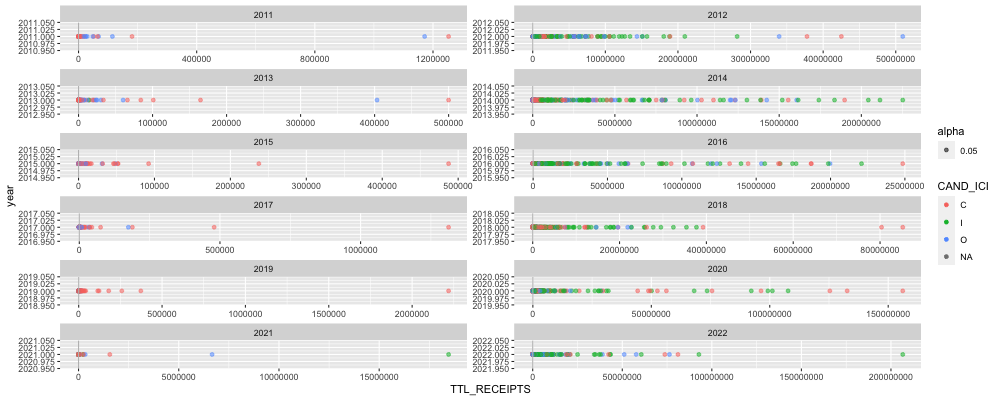

In [76]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

decade_senate_df_r <- read_csv("decade_senate_df.csv")

ggplot(decade_senate_df_r) +
    aes(x=TTL_RECEIPTS, y=year, color=CAND_ICI, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey') +
    facet_wrap(~year, ncol=2, scales='free')

New names:
• `` -> `...1`
Rows: 3318 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): CAND_ID, CAND_NAME, CAND_ICI, CAND_PTY_AFFILIATION, CAND_OFFICE_ST...
dbl (22): ...1, PTY_CD, TTL_RECEIPTS, TRANS_FROM_AUTH, TTL_DISB, TRANS_TO_AU...
lgl  (1): RUN_ELECTION

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


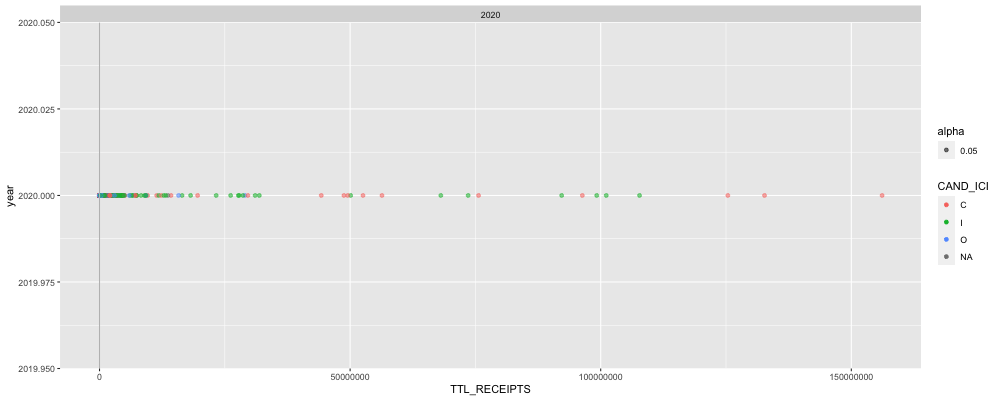

In [75]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

twenty_senate_df_r <- read_csv("decade_senate_df.csv") %>%
    filter(year=="2020")


ggplot(twenty_senate_df_r) +
    aes(x=TTL_RECEIPTS, y=year, color=CAND_ICI, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey') +facet_wrap(~year, ncol=2)

New names:
• `` -> `...1`
Rows: 3318 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): CAND_ID, CAND_NAME, CAND_ICI, CAND_PTY_AFFILIATION, CAND_OFFICE_ST...
dbl (22): ...1, PTY_CD, TTL_RECEIPTS, TRANS_FROM_AUTH, TTL_DISB, TRANS_TO_AU...
lgl  (1): RUN_ELECTION

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


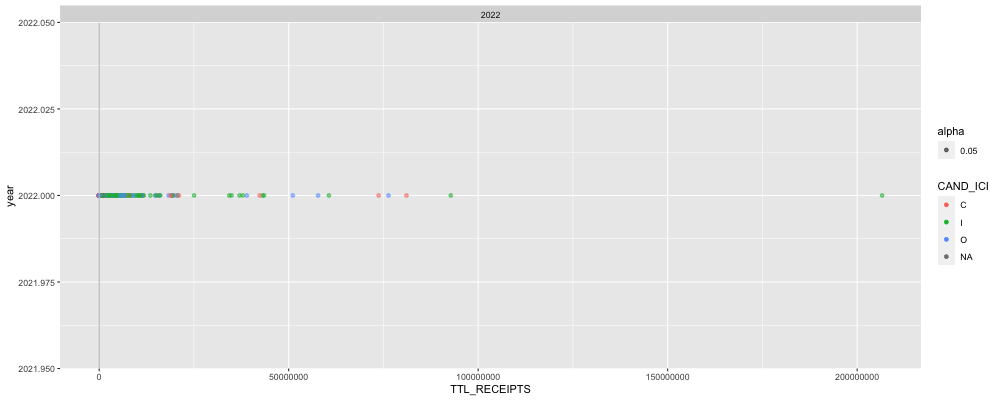

In [78]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

twentytwo_senate_df_r <- read_csv("decade_senate_df.csv") %>%
    filter(year=="2022")


ggplot(twentytwo_senate_df_r) +
    aes(x=TTL_RECEIPTS, y=year, color=CAND_ICI, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey') +facet_wrap(~year, ncol=2)

In [77]:
hegar_df=decade_df.query("CAND_NAME.str.contains('HEGAR')")
hegar_df

,CAND_ID,CAND_NAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,COH_BOP,COH_COP,CAND_CONTRIB,CAND_LOANS,OTHER_LOANS,CAND_LOAN_REPAY,OTHER_LOAN_REPAY,DEBTS_OWED_BY,TTL_INDIV_CONTRIB,CAND_OFFICE_ST,CAND_OFFICE_DISTRICT,SPEC_ELECTION,PRIM_ELECTION,RUN_ELECTION,GEN_ELECTION,GEN_ELECTION_PRECENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS,year,cand_type
3006,H8TX31058,"HEGAR, MARY JENNINGS MJ",C,1,DEM,"$232,569.26",$0.00,"$270,845.59",$0.00,"$86,564.80","$48,288.47",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,TX,$31.00,NaN,NaN,NaN,NaN,NaN,$0.00,$0.00,12/31/2022,"$6,141.56",$0.00,2022,H
4068,S0TX00233,"HEGAR, MARY JENNINGS MJ",C,1,DEM,"$232,569.26",$0.00,"$270,845.59",$0.00,"$86,564.80","$48,288.47",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,TX,$0.00,NaN,NaN,NaN,NaN,NaN,$0.00,$0.00,12/31/2022,"$6,141.56",$0.00,2022,S
2879,H8TX31058,"HEGAR, MARY JENNINGS MJ",C,1,DEM,"$29,597,569.83","$872,922.24","$29,558,486.93","$43,000.00","$47,481.90","$86,564.80",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$28,046,021.96",TX,$31.00,NaN,NaN,NaN,NaN,NaN,"$551,645.55","$54,600.00",12/31/2020,"$249,486.42","$2,899.99",2020,H
3895,S0TX00233,"HEGAR, MARY JENNINGS MJ",C,1,DEM,"$29,597,569.83","$872,922.24","$29,558,486.93","$43,000.00","$47,481.90","$86,564.80",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$28,046,021.96",TX,$0.00,NaN,NaN,NaN,NaN,NaN,"$551,645.55","$54,600.00",12/31/2020,"$249,486.42","$2,899.99",2020,S
2738,H8TX31058,"HEGAR, MARY JENNINGS MJ",C,1,DEM,"$5,122,102.12","$237,275.69","$5,069,600.64",$0.00,$0.00,"$47,481.90","$7,301.56",$0.00,$0.00,$0.00,$0.00,$0.00,"$4,632,043.02",TX,$31.00,NaN,NaN,NaN,NaN,NaN,"$229,147.92","$4,000.00",12/31/2018,"$58,590.34",$0.00,2018,H
